## Initialize

In [1]:
#library(Rmisc)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)

Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘arrow’ was built under R version 4.0.3”

Attaching package: ‘arrow’


The following object is masked from ‘p

In [2]:
library(ggforce)

In [3]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

dataset_name = "210714_metabolomics"
path = "/data/analysis/ag-reils/steinfej/code/umbrella/pre/ukbb"
data_path = glue("{base_path}/data")
dataset_path = glue("{data_path}/3_datasets_post/{dataset_name}")

project_label="21_metabolomics_multitask"
project_path = glue("{base_path}/results/projects/{project_label}")
figures_path = glue("{project_path}/figures")
data_results_path = glue("{project_path}/data")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [4]:
data_results_path

/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/data

## Load data

In [5]:
list.dirs(path = project_path, full.names = TRUE, recursive = TRUE)

[1] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask"                                         
[2] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/data"                                    
[3] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures"                                 
[4] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/.ipynb_checkpoints"              
[5] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP"                            
[6] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/basics"                     
[7] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/basics/.ipynb_checkpoints"  
[8] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/endpoint"                   
[9] "/sc-projects/sc-proj-ukb-cvd/results/projects/21_metabolomics_multitask/figures/UMAP/endpoint/.ipynb_checkpoints"

In [6]:
run = "211007"
data = arrow::read_feather(glue("{dataset_path}/data_merged.feather")) 
data_description = arrow::read_feather(glue("{dataset_path}/description_merged.feather"))

predictions = arrow::read_feather(glue("{data_results_path}/predictions_{run}_metabolomics.feather")) 
loghazards = arrow::read_feather(glue("{data_results_path}/loghazards_model_{run}_metabolomics.feather")) %>% pivot_longer(starts_with("logh"), names_to=c("endpoint", "features"), values_to="logh", names_pattern="logh_?(.*)_(.*)$")

In [7]:
colnames(predictions)

[1] "index"     "eid"       "endpoint"  "module"    "features"  "partition"
 [7] "Ft_1"      "Ft_2"      "Ft_3"      "Ft_4"      "Ft_5"      "Ft_6"     
[13] "Ft_7"      "Ft_8"      "Ft_9"      "Ft_10"     "Ft_11"     "Ft_12"    
[19] "Ft_13"     "Ft_14"     "Ft_15"

In [8]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
library(ggplot2); 
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

## Attributions by correlation

In [9]:
library(ggforestplot)

In [10]:
# Deepexplainer
attributions_de = arrow::read_feather(glue("{data_results_path}/attributions_211026.feather")) %>% mutate(explainer="DeepExplainer")

Warning message:
“Coercing dictionary values to R character factor levels”
Warning message:
“Coercing dictionary values to R character factor levels”


In [11]:
attributions = attributions_de#bind_rows(attributions_de, attributions_ke)

## Attributions by shap

In [12]:
library("ggbeeswarm")

Warning message:
“package ‘ggbeeswarm’ was built under R version 4.0.5”


In [13]:
library(ggthemes)
endpoint_map = c(
    'M_MACE'='MACE',
    'M_all_cause_dementia'='Dementia',
    'M_type_2_diabetes'='T2 Diabetes',
    'M_liver_disease'='Liver Disease',
    'M_renal_disease'='Renal Disease',
    'M_atrial_fibrillation'='Atrial Fibrillation',
    'M_heart_failure'= 'Heart Failure',
    'M_coronary_heart_disease'='CHD',
    'M_venous_thrombosis'='Ven. Thrombosis',
    'M_cerebral_stroke'='Cerebral Stroke',
    'M_abdominal_aortic_aneurysm'='AAA',
    'M_peripheral_arterial_disease'='PAD',
    "M_chronic_obstructuve_pulmonary_disease" = "COPD",
    "M_asthma" = "Asthma",
    'M_parkinsons_disease' = "Parkinson's",    
    "M_lung_cancer" = "Lung Cancer",
    "M_non_melanoma_skin_cancer" = "Skin Cancer",
    "M_colon_cancer"= "Colon Cancer",
    "M_rectal_cancer" = "Rectal Cancer",
    "M_prostate_cancer"= "Prostate Cancer",
    "M_breast_cancer" = "Breast Cancer",
    'M_cataracts' = "Cataracts", 
    'M_glaucoma' = "Glaucoma",
    'M_fractures' = "Fractures"
)

endpoint_order = c("M_MACE", "M_coronary_heart_disease", "M_cerebral_stroke", "M_all_cause_dementia", "M_heart_failure", "M_atrial_fibrillation",
                   "M_type_2_diabetes", "M_liver_disease", "M_renal_disease", "M_peripheral_arterial_disease", "M_venous_thrombosis",  "M_abdominal_aortic_aneurysm",
                   "M_chronic_obstructuve_pulmonary_disease", "M_asthma", 'M_parkinsons_disease', 'M_cataracts', 'M_glaucoma', 'M_fractures',
                    "M_lung_cancer","M_non_melanoma_skin_cancer","M_colon_cancer","M_rectal_cancer","M_prostate_cancer","M_breast_cancer"
                   
)

Warning message:
“package ‘ggthemes’ was built under R version 4.0.3”


In [14]:
library(ggforestplot)
ng_names = df_NG_biomarker_metadata %>% mutate(metabolite = str_replace_all(tolower(description), " ", "_"))
ng_names %>% sample_n(10)

abbreviation machine_readable_name name        
1  LDL-TG       LDL_TG                LDL-TG      
2  S-LDL-PL     S_LDL_PL              S-LDL-PL    
3  XL-VLDL-L    XL_VLDL_L             XL-VLDL-L   
4  S-HDL-TG     S_HDL_TG              S-HDL-TG    
5  L-VLDL-P     L_VLDL_P              L-VLDL-P    
6  M-LDL-FC     M_LDL_FC              M-LDL-FC    
7  L-HDL-FC %   L_HDL_FC_pct          L-HDL-FC %  
8  L-LDL-P      L_LDL_P               L-LDL-P     
9  S-LDL-L      S_LDL_L               S-LDL-L     
10 XXL-VLDL-C % XXL_VLDL_C_pct        XXL-VLDL-C %
   description                                                               
1  Triglycerides in LDL                                                      
2  Phospholipids in small LDL                                                
3  Total lipids in very large VLDL                                           
4  Triglycerides in small HDL                                                
5  Concentration of large VLDL particles                                     
6  Free cholesterol in medium LDL                                            
7  Free cholesterol to total lipids ratio in large HDL                       
8  Concentration of large LDL particles                                      
9  Total lipids in small LDL                                                 
10 Cholesterol to total lipids ratio in chylomicrons and extremely large VLDL
   alternative_names                             
1  LDL-TG, LDL_TG                                
2  S-LDL-PL, S_LDL_PL                            
3  XL-VLDL-L, XL_VLDL_L                          
4  S-HDL-TG, S_HDL_TG                            
5  L-VLDL-P, L_VLDL_P                            
6  M-LDL-FC, M_LDL_FC                            
7  L-HDL-FC_%  , L-HDL-FC %  , L_HDL_FC_pct      
8  L-LDL-P, L_LDL_P                              
9  S-LDL-L, S_LDL_L                              
10 XXL-VLDL-C_%  , XXL-VLDL-C %  , XXL_VLDL_C_pct
   group                                    
1  Triglycerides                            
2  Lipoprotein subclasses                   
3  Lipoprotein subclasses                   
4  Lipoprotein subclasses                   
5  Lipoprotein subclasses                   
6  Lipoprotein subclasses                   
7  Relative lipoprotein lipid concentrations
8  Lipoprotein subclasses                   
9  Lipoprotein subclasses                   
10 Relative lipoprotein lipid concentrations
   subgroup                                     unit      
1  Triglycerides                                deprecated
2  Small LDL                                    deprecated
3  Very large VLDL                              deprecated
4  Small HDL                                    deprecated
5  Large VLDL                                   deprecated
6  Medium LDL                                   deprecated
7  Large HDL ratios                             deprecated
8  Large LDL                                    deprecated
9  Small LDL                                    deprecated
10 Chylomicrons and extremely large VLDL ratios deprecated
   metabolite                                                                
1  triglycerides_in_ldl                                                      
2  phospholipids_in_small_ldl                                                
3  total_lipids_in_very_large_vldl                                           
4  triglycerides_in_small_hdl                                                
5  concentration_of_large_vldl_particles                                     
6  free_cholesterol_in_medium_ldl                                            
7  free_cholesterol_to_total_lipids_ratio_in_large_hdl                       
8  concentration_of_large_ldl_particles                                      
9  total_lipids_in_small_ldl                                                 
10 cholesterol_to_total_lipids_ratio_in_chylomicrons_and_extremely_large_vldl

In [15]:
ng_names %>% select(group, subgroup) %>% distinct() %>% arrange(group, subgroup)

group                                    
1  Amino acids                              
2  Amino acids                              
3  Amino acids                              
4  Apolipoproteins                          
5  Cholesterol                              
6  Cholesteryl esters                       
7  Fatty acids                              
8  Fatty acids                              
9  Fluid balance                            
10 Free cholesterol                         
11 Glycolysis related metabolites           
12 Inflammation                             
13 Ketone bodies                            
14 Lipoprotein particle concentrations      
15 Lipoprotein particle sizes               
16 Lipoprotein subclasses                   
17 Lipoprotein subclasses                   
18 Lipoprotein subclasses                   
19 Lipoprotein subclasses                   
20 Lipoprotein subclasses                   
21 Lipoprotein subclasses                   
22 Lipoprotein subclasses                   
23 Lipoprotein subclasses                   
24 Lipoprotein subclasses                   
25 Lipoprotein subclasses                   
26 Lipoprotein subclasses                   
27 Lipoprotein subclasses                   
28 Lipoprotein subclasses                   
29 Lipoprotein subclasses                   
30 Other lipids                             
31 Phospholipids                            
32 Relative lipoprotein lipid concentrations
33 Relative lipoprotein lipid concentrations
34 Relative lipoprotein lipid concentrations
35 Relative lipoprotein lipid concentrations
36 Relative lipoprotein lipid concentrations
37 Relative lipoprotein lipid concentrations
38 Relative lipoprotein lipid concentrations
39 Relative lipoprotein lipid concentrations
40 Relative lipoprotein lipid concentrations
41 Relative lipoprotein lipid concentrations
42 Relative lipoprotein lipid concentrations
43 Relative lipoprotein lipid concentrations
44 Relative lipoprotein lipid concentrations
45 Relative lipoprotein lipid concentrations
46 Total lipids                             
47 Triglycerides                            
   subgroup                                    
1  Amino acids                                 
2  Aromatic amino acids                        
3  Branched-chain amino acids                  
4  Apolipoproteins                             
5  Cholesterol                                 
6  Cholesteryl esters                          
7  Fatty acid ratios                           
8  Fatty acids                                 
9  Fluid balance                               
10 Free cholesterol                            
11 Glycolysis related metabolites              
12 Inflammation                                
13 Ketone bodies                               
14 Lipoprotein particle concentrations         
15 Lipoprotein particle sizes                  
16 Chylomicrons and extremely large VLDL       
17 IDL                                         
18 Large HDL                                   
19 Large LDL                                   
20 Large VLDL                                  
21 Medium HDL                                  
22 Medium LDL                                  
23 Medium VLDL                                 
24 Small HDL                                   
25 Small LDL                                   
26 Small VLDL                                  
27 Very large HDL                              
28 Very large VLDL                             
29 Very small VLDL                             
30 Other lipids                                
31 Phospholipids                               
32 Chylomicrons and extremely large VLDL ratios
33 IDL ratios                                  
34 Large HDL ratios                            
35 Large LDL ratios                            
36 Large VLDL ratios                           
37 Medium HDL ratios                           
38 Medium LDL ratio

In [16]:
library(fuzzyjoin)

Warning message:
“package ‘fuzzyjoin’ was built under R version 4.0.5”


In [17]:
subgroup_order = c( 'Amino acids',
                    'Branched-chain amino acids',
                   'Aromatic amino acids',
                   'Fluid balance',
                   'Inflammation',
                    'Fatty acids',
                    'Glycolysis related metabolites',
                    'Ketone bodies',
         
                   'Total lipids',
                    'Cholesterol',
                    'Free cholesterol',
                   'Cholesteryl esters',
                   'Phospholipids',
                   'Triglycerides',
                   'Other lipids',
                   
                    'Lipoprotein particle sizes',
                    'Lipoprotein particle concentrations',
                    'Chylomicrons and extremely large VLDL',
                   'Very large VLDL',
                   'Large VLDL',
                   'Medium VLDL',
                   'Small VLDL',
                   'Very small VLDL',
              
                   'Large LDL',
                   'Medium LDL',
                   'Small LDL',
                    'IDL',
                   'Very large HDL',
                   'Large HDL',
                   'Medium HDL',
                   'Small HDL',
                   'Apolipoproteins'
                  )

In [18]:
mets1 = attributions %>% select(metabolite) %>% distinct() %>% left_join(ng_names, by = "metabolite")
mets2 = mets1 %>% filter(is.na(name)) %>% select(metabolite) %>% stringdist_left_join(ng_names, by = "metabolite", max_dist = 1) %>% 
    rename(metabolite = metabolite.x) %>% select(-metabolite.y) %>% distinct()
mets3 = mets2 %>% filter(is.na(name)) %>% select(metabolite) %>% stringdist_left_join(ng_names, by = "metabolite", max_dist = 8) %>% 
    rename(metabolite = metabolite.x) %>% select(-metabolite.y) %>% distinct() 
mets = bind_rows(mets1 %>% filter(!is.na(name)), mets2 %>% filter(!is.na(name)), mets3) %>% mutate(subgroup = factor(subgroup, levels=subgroup_order)) %>% arrange(subgroup, abbreviation)
abbreviation_order = mets$abbreviation
metabolite_order = mets$metabolite
mets %>% sample_n(5)

metabolite                      abbreviation machine_readable_name name     
1 phospholipids_in_large_hdl      L-HDL-PL     L_HDL_PL              L-HDL-PL 
2 phospholipids_in_vldl           VLDL-PL      VLDL_PL               VLDL-PL  
3 free_cholesterol_in_medium_vldl M-VLDL-FC    M_VLDL_FC             M-VLDL-FC
4 acetate                         Acetate      Acetate               Acetate  
5 triglycerides_in_small_vldl     S-VLDL-TG    S_VLDL_TG             S-VLDL-TG
  description                     alternative_names    group                 
1 Phospholipids in large HDL      L-HDL-PL, L_HDL_PL   Lipoprotein subclasses
2 Phospholipids in VLDL           VLDL-PL, VLDL_PL     Phospholipids         
3 Free cholesterol in medium VLDL M-VLDL-FC, M_VLDL_FC Lipoprotein subclasses
4 Acetate                         Ace    , Acetate     Ketone bodies         
5 Triglycerides in small VLDL     S-VLDL-TG, S_VLDL_TG Lipoprotein subclasses
  subgroup      unit      
1 Large HDL     deprecated
2 Phospholipids deprecated
3 Medium VLDL   deprecated
4 Ketone bodies deprecated
5 Small VLDL    deprecated

In [19]:
attributions_metadata = attributions %>% left_join(mets %>% select(metabolite, abbreviation, group, subgroup), by="metabolite") %>% mutate(eid=as.integer(as.character(eid)))

In [20]:
library(gghighlight)

Warning message:
“package ‘gghighlight’ was built under R version 4.0.5”


## Global attributions

In [21]:
attrib_raw = arrow::read_feather(glue("{data_results_path}/REVISION_220110_attrib_raw.feather"))
attrib_sample = attrib_raw %>% group_by(endpoint, metabolite, explainer) %>% 
    mutate(shap_quantile=ntile(shap, 100), met_quantile=ntile(met_value, 100))

## UMAP

In [22]:
temp_umap_shap = arrow::read_feather(glue("{data_results_path}/temp_umap_shap_220216.feather"))

In [23]:
endpoint="M_type_2_diabetes"

In [24]:
temp_ep = temp_umap_shap %>% filter(endpoint==!!endpoint)# %>% filter(x>2&x<12) %>% filter(hr>5)#&hr<12) #'%>% filter(event==FALSE)

In [25]:
# excluded in the visualisation
nrow(temp_ep) - nrow(temp_ep %>% filter(x>3&x<12) %>% filter(y<12))

[1] 41

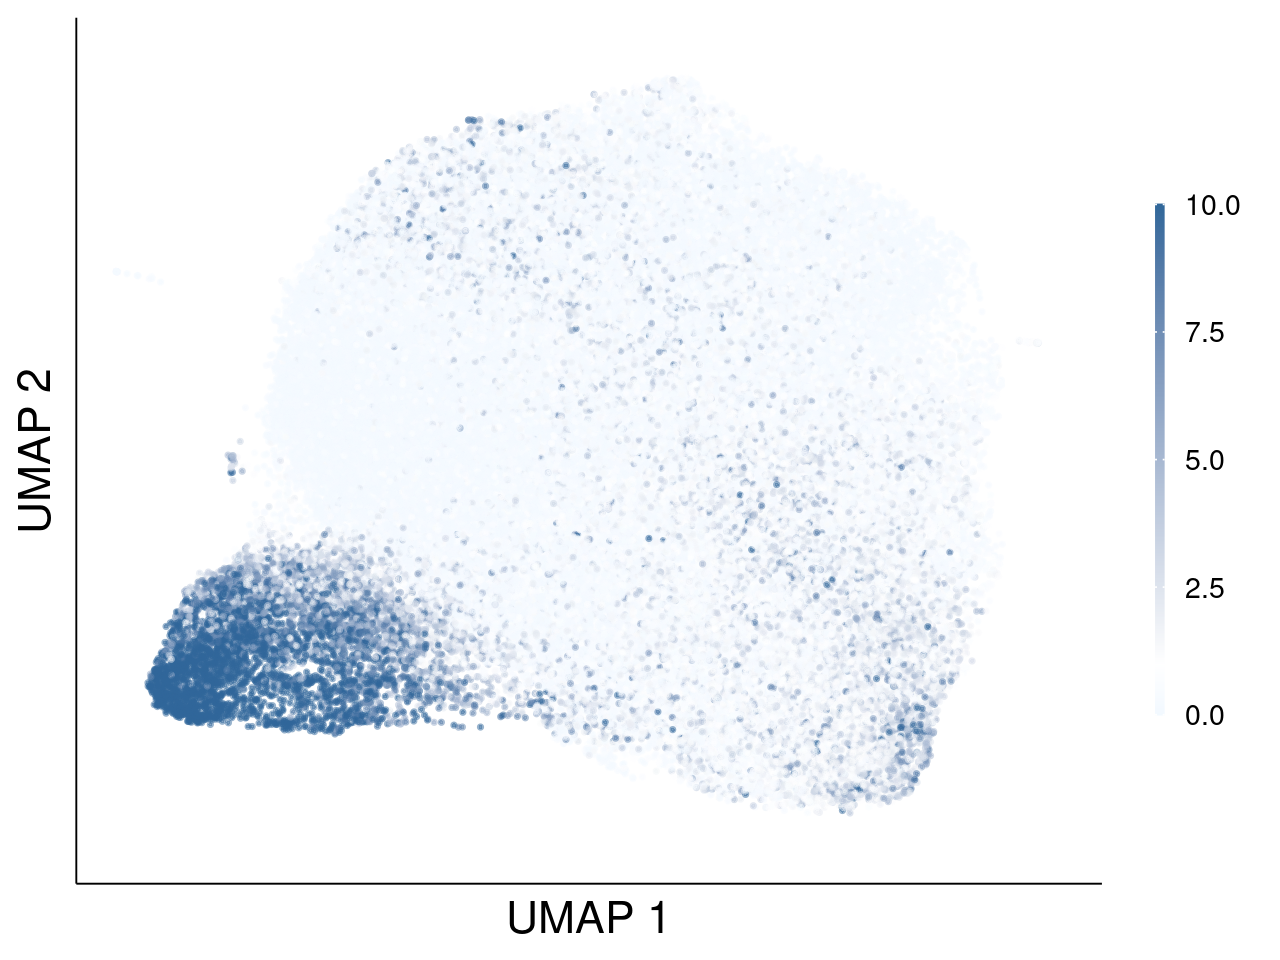

In [26]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 320)
variable = "hr"
temp_plot = temp_ep %>% select(eid, endpoint, x, y, event, hr, !!variable, incident_event) #%>% filter(hr>3) #%>% filter(incident_event==TRUE)  #%>% sample_n(1000009)
umap_hr = ggplot(temp_plot, aes_string(x="x", y="y", color=variable)) + 
    labs(x="UMAP 1", y="UMAP 2", color="Metabolomic State")+ 
    geom_point(size=0.1, alpha=0.5) +
#        scale_colour_gradient(limits=c(0.3, 20),
#  low = "#7AC6FF",
#  high = "#023768",
#  space = "Lab",
#  na.value = "#023768",
#  guide = guide_colourbar(barheight=12.5, barwidth = 0.15),
#  aesthetics = "colour"
#)+
    scale_colour_gradient2(low = "#7AC6FF", high = "#31679A", midpoint = 1, limits=c(0, 10), oob=scales::squish, 
                                                            guide = guide_colourbar(barheight=8, barwidth = 0.15))+#, label.vjust=1)) + 
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    #geom_vline(xintercept=3)+geom_vline(xintercept=7)+
    #geom_hline(yintercept=1.5)+geom_hline(yintercept=5) + 
    coord_cartesian(xlim=c(3, 12), ylim=c(0, 12)) + theme(legend.position="right", legend.title = element_blank()) #+ guides(fill= guide_colorbar(barheight=0.1, barwidth = 0.1))
    # + facet_grid(cols=vars(factor(event, levels=c("TRUE", "FALSE"))), rows=vars(incident_event), labeller = labeller(.rows = label_both, .cols = label_both))
umap_hr

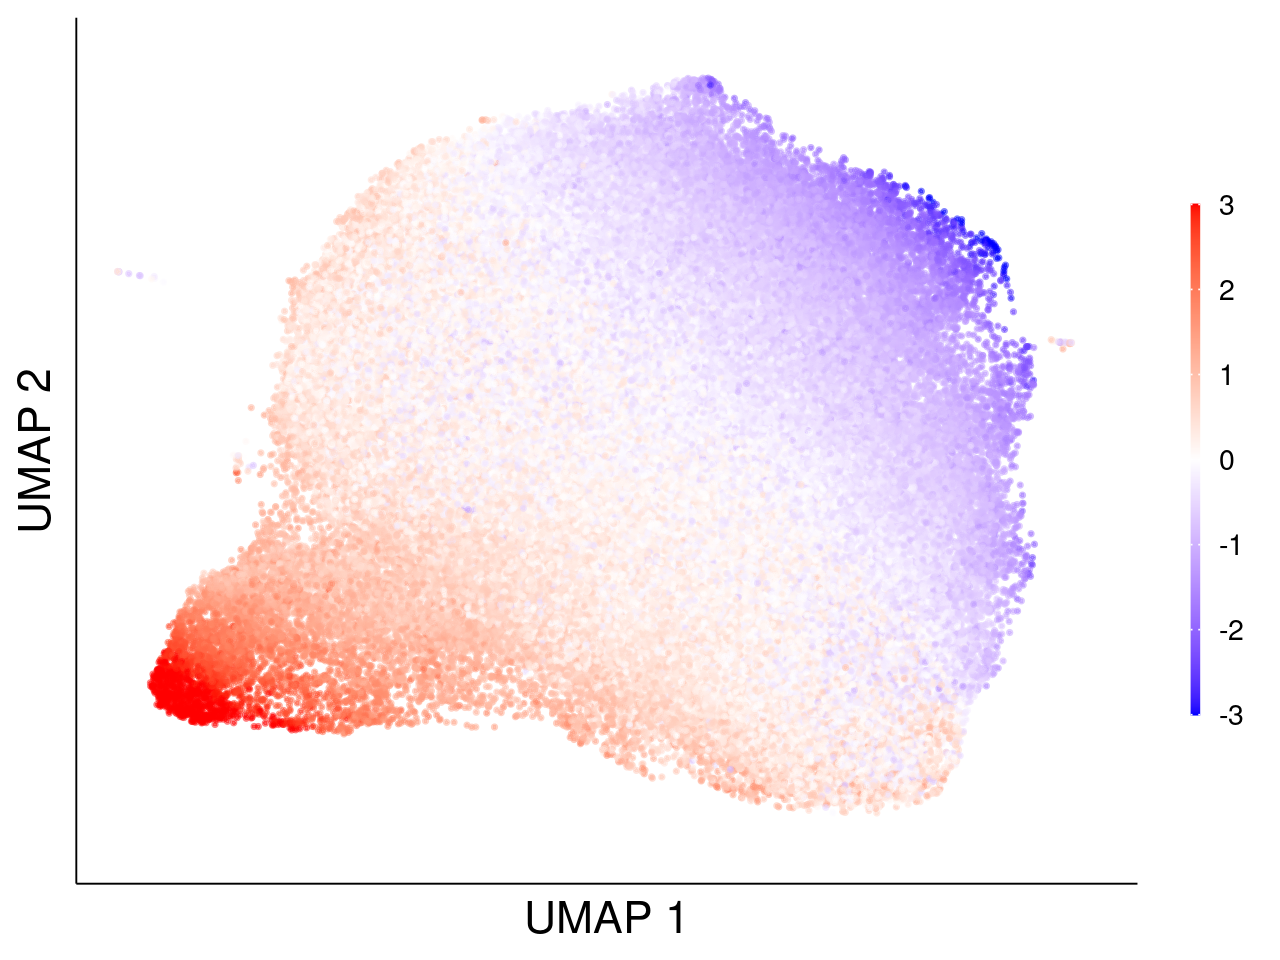

In [27]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 320)
variable = "shap_glucose"
temp_plot = temp_ep %>% select(eid, endpoint, x, y, event, hr, !!variable, incident_event) #%>% filter(hr>3) #%>% filter(incident_event==TRUE)  #%>% sample_n(1000009)
umap_glucose_shap = ggplot(temp_plot, aes_string(x="x", y="y", color=variable)) + 
    labs(x="UMAP 1", y="UMAP 2", color="SHAP (Glucose)")+   scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-3, +3), oob=scales::squish, 
                                                            guide = guide_colourbar(barheight=8, barwidth = 0.15))+#, label.vjust=1)) + 
    geom_point(size=0.1, alpha=0.5) + #scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-1, 1), oob=scales::squish) + 
      theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    coord_cartesian(xlim=c(3, 12), ylim=c(0, 12)) + theme(legend.position="right", legend.title = element_blank()) #+
umap_glucose_shap

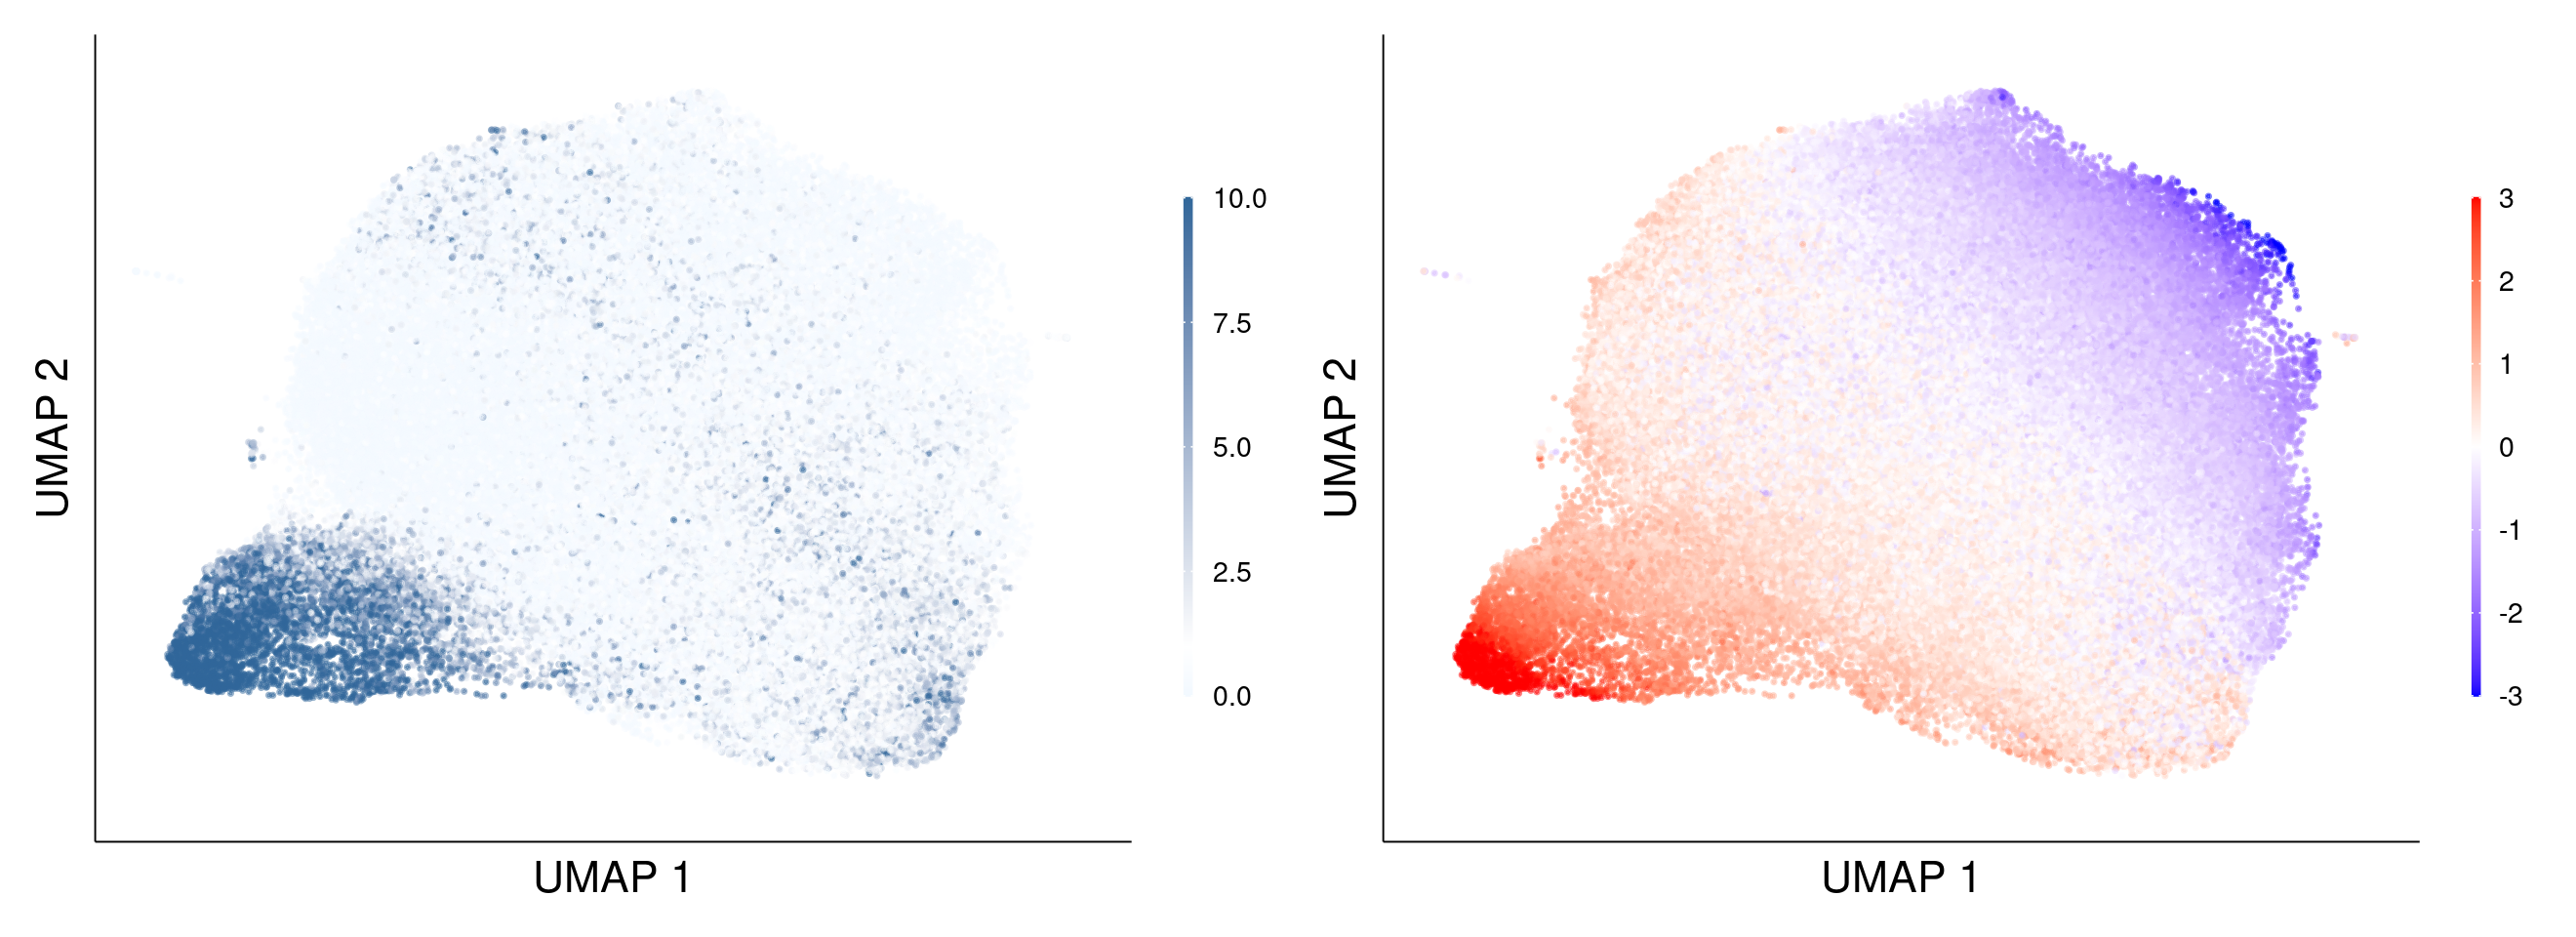

In [44]:
plot_width=8.25; plot_height=3
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
fig6_A = umap_hr + umap_glucose_shap
fig6_A

In [45]:
library(gt)
plot_name = "Suppl_Figures_8_AB_UMAP"
fig6_A %>% ggsave(filename=glue("outputs/{plot_name}.tiff"), device="tiff", width=plot_width, height=plot_height, dpi=320)

In [33]:
eids_A_highlight = 2475864#4435348#
eids_B_highlight = 1239178#1204403
eids_C_highlight = 1690024#4135514#

tempA = temp_ep %>% filter(eid == eids_A_highlight)
tempB = temp_ep %>% filter(eid == eids_B_highlight)
tempC = temp_ep %>% filter(eid == eids_C_highlight)

In [34]:
tempA %>% select(eid, endpoint, hr) %>% distinct()

eid     endpoint          hr      
1 2475864 M_type_2_diabetes 11.56439

In [35]:
tempB %>% select(eid, endpoint, hr) %>% distinct()

eid     endpoint          hr      
1 1239178 M_type_2_diabetes 11.75029

In [36]:
tempC %>% select(eid, endpoint, hr) %>% distinct()

eid     endpoint          hr      
1 1690024 M_type_2_diabetes 10.26274

In [37]:
calc_dist = function(xref, yref, x, y){sqrt((x-xref)^2+(y-yref)^2)}
temp_areas = temp_ep %>% mutate(distA = calc_dist(tempA$x, tempA$y, x, y), distB = calc_dist(tempB$x, tempB$y, x, y), distC = calc_dist(tempC$x, tempC$y, x, y)) %>%
    pivot_longer(c(starts_with("dist"), -contains("disturbance")), names_to="reference", values_to="dist", names_prefix="dist") %>%
    mutate(area = case_when(reference=="A"&dist<1 ~ "A", reference=="B"&dist<1 ~ "B", reference=="C"&dist<1 ~ "C", dist>=1 ~ "None")) %>% select(-dist, -reference) %>% distinct() %>%
    select(eid, area)

In [38]:
temp_ep = temp_ep %>% left_join(temp_areas)

Joining, by = "eid"



In [39]:
library(ggforce)

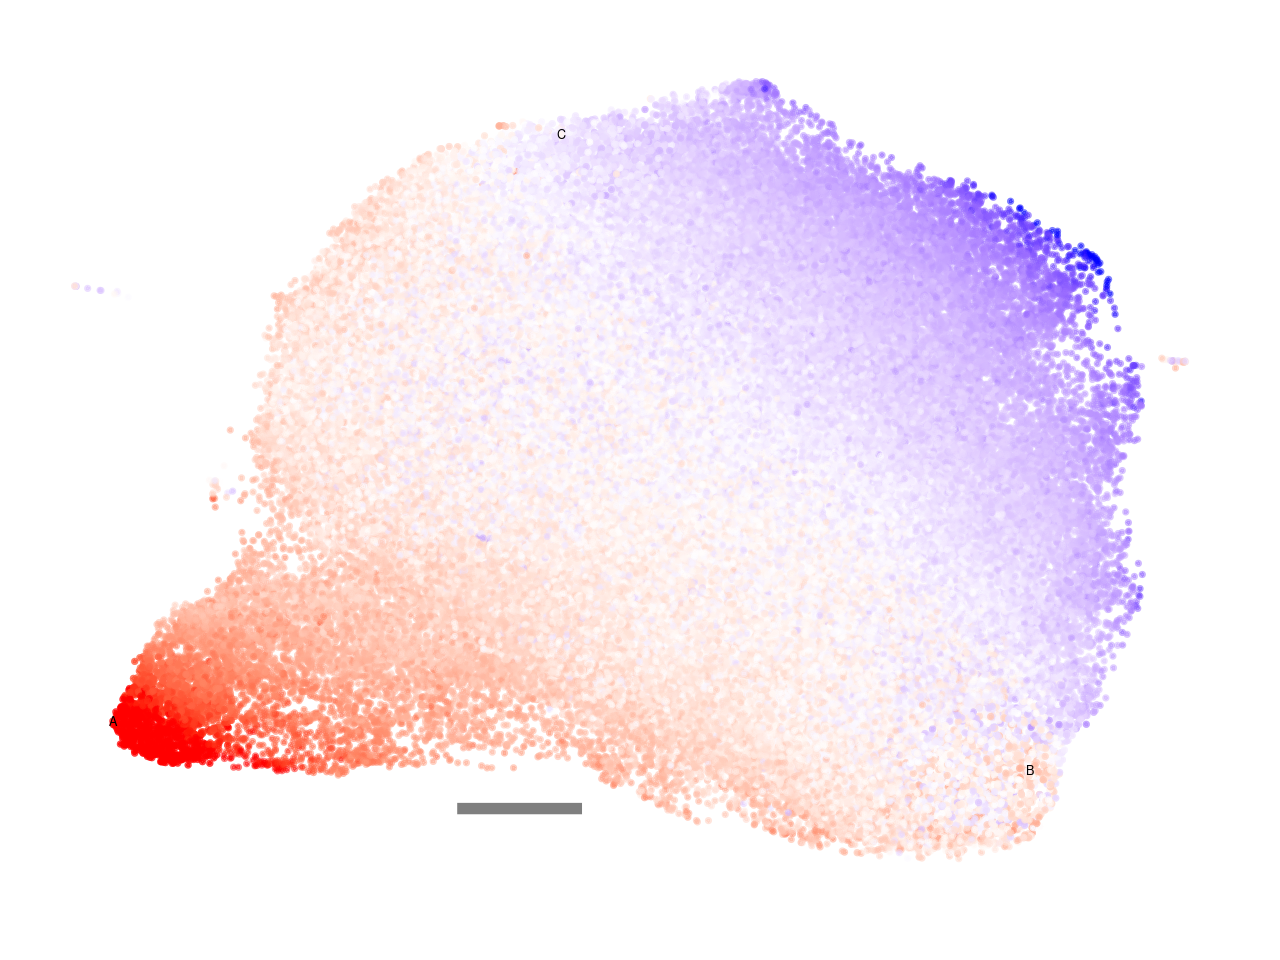

In [60]:
plot_width=4; plot_height=3
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
variable = "shap_glucose"
temp_plot = temp_ep %>% select(eid, endpoint, x, y, event, hr, !!variable, incident_event, area) 
fig6_c_centre = ggplot(temp_plot, aes_string(x="x", y="y", color=variable)) + 
    labs(x=NULL, y=NULL, color="Metabolomic State")+ 
    geom_point(size=0.1, alpha=0.5) +
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-3, +3), oob=scales::squish, 
                                                            guide = guide_colourbar(barheight=12.5, barwidth = 0.15))+#, label.vjust=1)) + 
    #geom_mark_circle(aes(fill = area, label = area, filter=area!="None"))+
    theme(axis.line = element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    
    coord_cartesian(xlim=c(3, 12), ylim=c(0, 12)) + theme(legend.position="none") +
    annotate("text", x=tempA$x, y=tempA$y, size=1, color="black", label="A") +
    annotate("text", x=tempB$x, y=tempB$y, size=1, color="black", label="B") +
    annotate("text", x=tempC$x, y=tempC$y, size=1, color="black", label="C") +
    annotate("segment", x=6, xend=7, y=1.2, yend=1.2, size=1.2, alpha=.5) 

#+#, legend.title = element_blank()) #+ guides(fill= guide_colorbar(barheight=0.1, barwidth = 0.1))
    # + facet_grid(cols=vars(factor(event, levels=c("TRUE", "FALSE"))), rows=vars(incident_event), labeller = labeller(.rows = label_both, .cols = label_both))
fig6_c_centre

In [61]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Suppl_Figures_8_C_Centre"
fig6_c_centre %>% ggsave(filename=glue("outputs/{plot_name}.tiff"), device="tiff", width=plot_width, height=plot_height, dpi=320)

In [ ]:
attrib_sample %>% filter(endpoint=="M_type_2_diabetes") %>% filter(event==FALSE) %>% ungroup() %>% select(eid, hr) %>% distinct() %>% mutate(hr_q = ntile(hr, 100)) %>% group_by(hr_q) %>% summarise(mean_hr=mean(hr))

In [151]:
metabolite_metadata

ERROR: Error in eval(expr, envir, enclos): object 'metabolite_metadata' not found


In [48]:
tempA %>% select(contains("VLDL"))

NMR_average_diameter_for_vldl_particles
1 36.174                                 
  NMR_cholesterol_in_chylomicrons_and_extremely_large_vldl
1 0.0087476                                               
  NMR_cholesterol_in_large_vldl NMR_cholesterol_in_medium_vldl
1 0.017746                      0.041011                      
  NMR_cholesterol_in_small_vldl NMR_cholesterol_in_very_large_vldl
1 0.054329                      0.006661                          
  NMR_cholesterol_in_very_small_vldl
1 0.10791                           
  NMR_cholesteryl_esters_in_chylomicrons_and_extremely_large_vldl
1 0.0034507                                                      
  NMR_cholesteryl_esters_in_large_vldl NMR_cholesteryl_esters_in_medium_vldl ⋯
1 0.010165                             0.020596                              ⋯
  shap_total_lipids_in_very_large_vldl shap_total_lipids_in_very_small_vldl
1 -0.0623728                           -0.1344788                          
  shap_triglycerides_in_chylomicrons_and_extremely_large_vldl
1 -0.05146756                                                
  shap_triglycerides_in_large_vldl shap_triglycerides_in_medium_vldl
1 -0.1366675                       0.0775141                        
  shap_triglycerides_in_small_vldl shap_triglycerides_in_vldl
1 -0.02350524                      -0.003860147              
  shap_triglycerides_in_very_large_vldl shap_triglycerides_in_very_small_vldl
1 -0.04596142                           -0.06589585                          
  shap_vldl_cholesterol
1 0.2524325

In [38]:
eids_A = temp_umap_shap %>% filter(endpoint=="M_type_2_diabetes") %>% filter(x>3.2&x<3.8&
                                                                        y>1.9&y<2.6) #%>% filter(hr>3)
eids_B = temp_umap_shap %>% filter(endpoint=="M_type_2_diabetes") %>% filter(x>10&x<11&
                                                                        y>0.6&y<1.8) #%>% filter(hr>3)
eids_C = temp_umap_shap %>% filter(endpoint=="M_type_2_diabetes") %>% filter(x>5&x<7&
                                                                        y>9&y<11) #%>% filter(hr>3)

In [39]:
attrib_A = attrib_sample %>% filter(endpoint=="M_type_2_diabetes") %>% filter(eid %in% eids_A$eid) %>% mutate(cluster="A")
attrib_B = attrib_sample %>% filter(endpoint=="M_type_2_diabetes") %>% filter(eid %in% eids_B$eid) %>% mutate(cluster="B")
attrib_C = attrib_sample %>% filter(endpoint=="M_type_2_diabetes") %>% filter(eid %in% eids_C$eid) %>% mutate(cluster="C")
attrib_clusters = bind_rows(attrib_A, attrib_B, attrib_C)

In [62]:
library(ggtext)

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”


[1] "2475864"


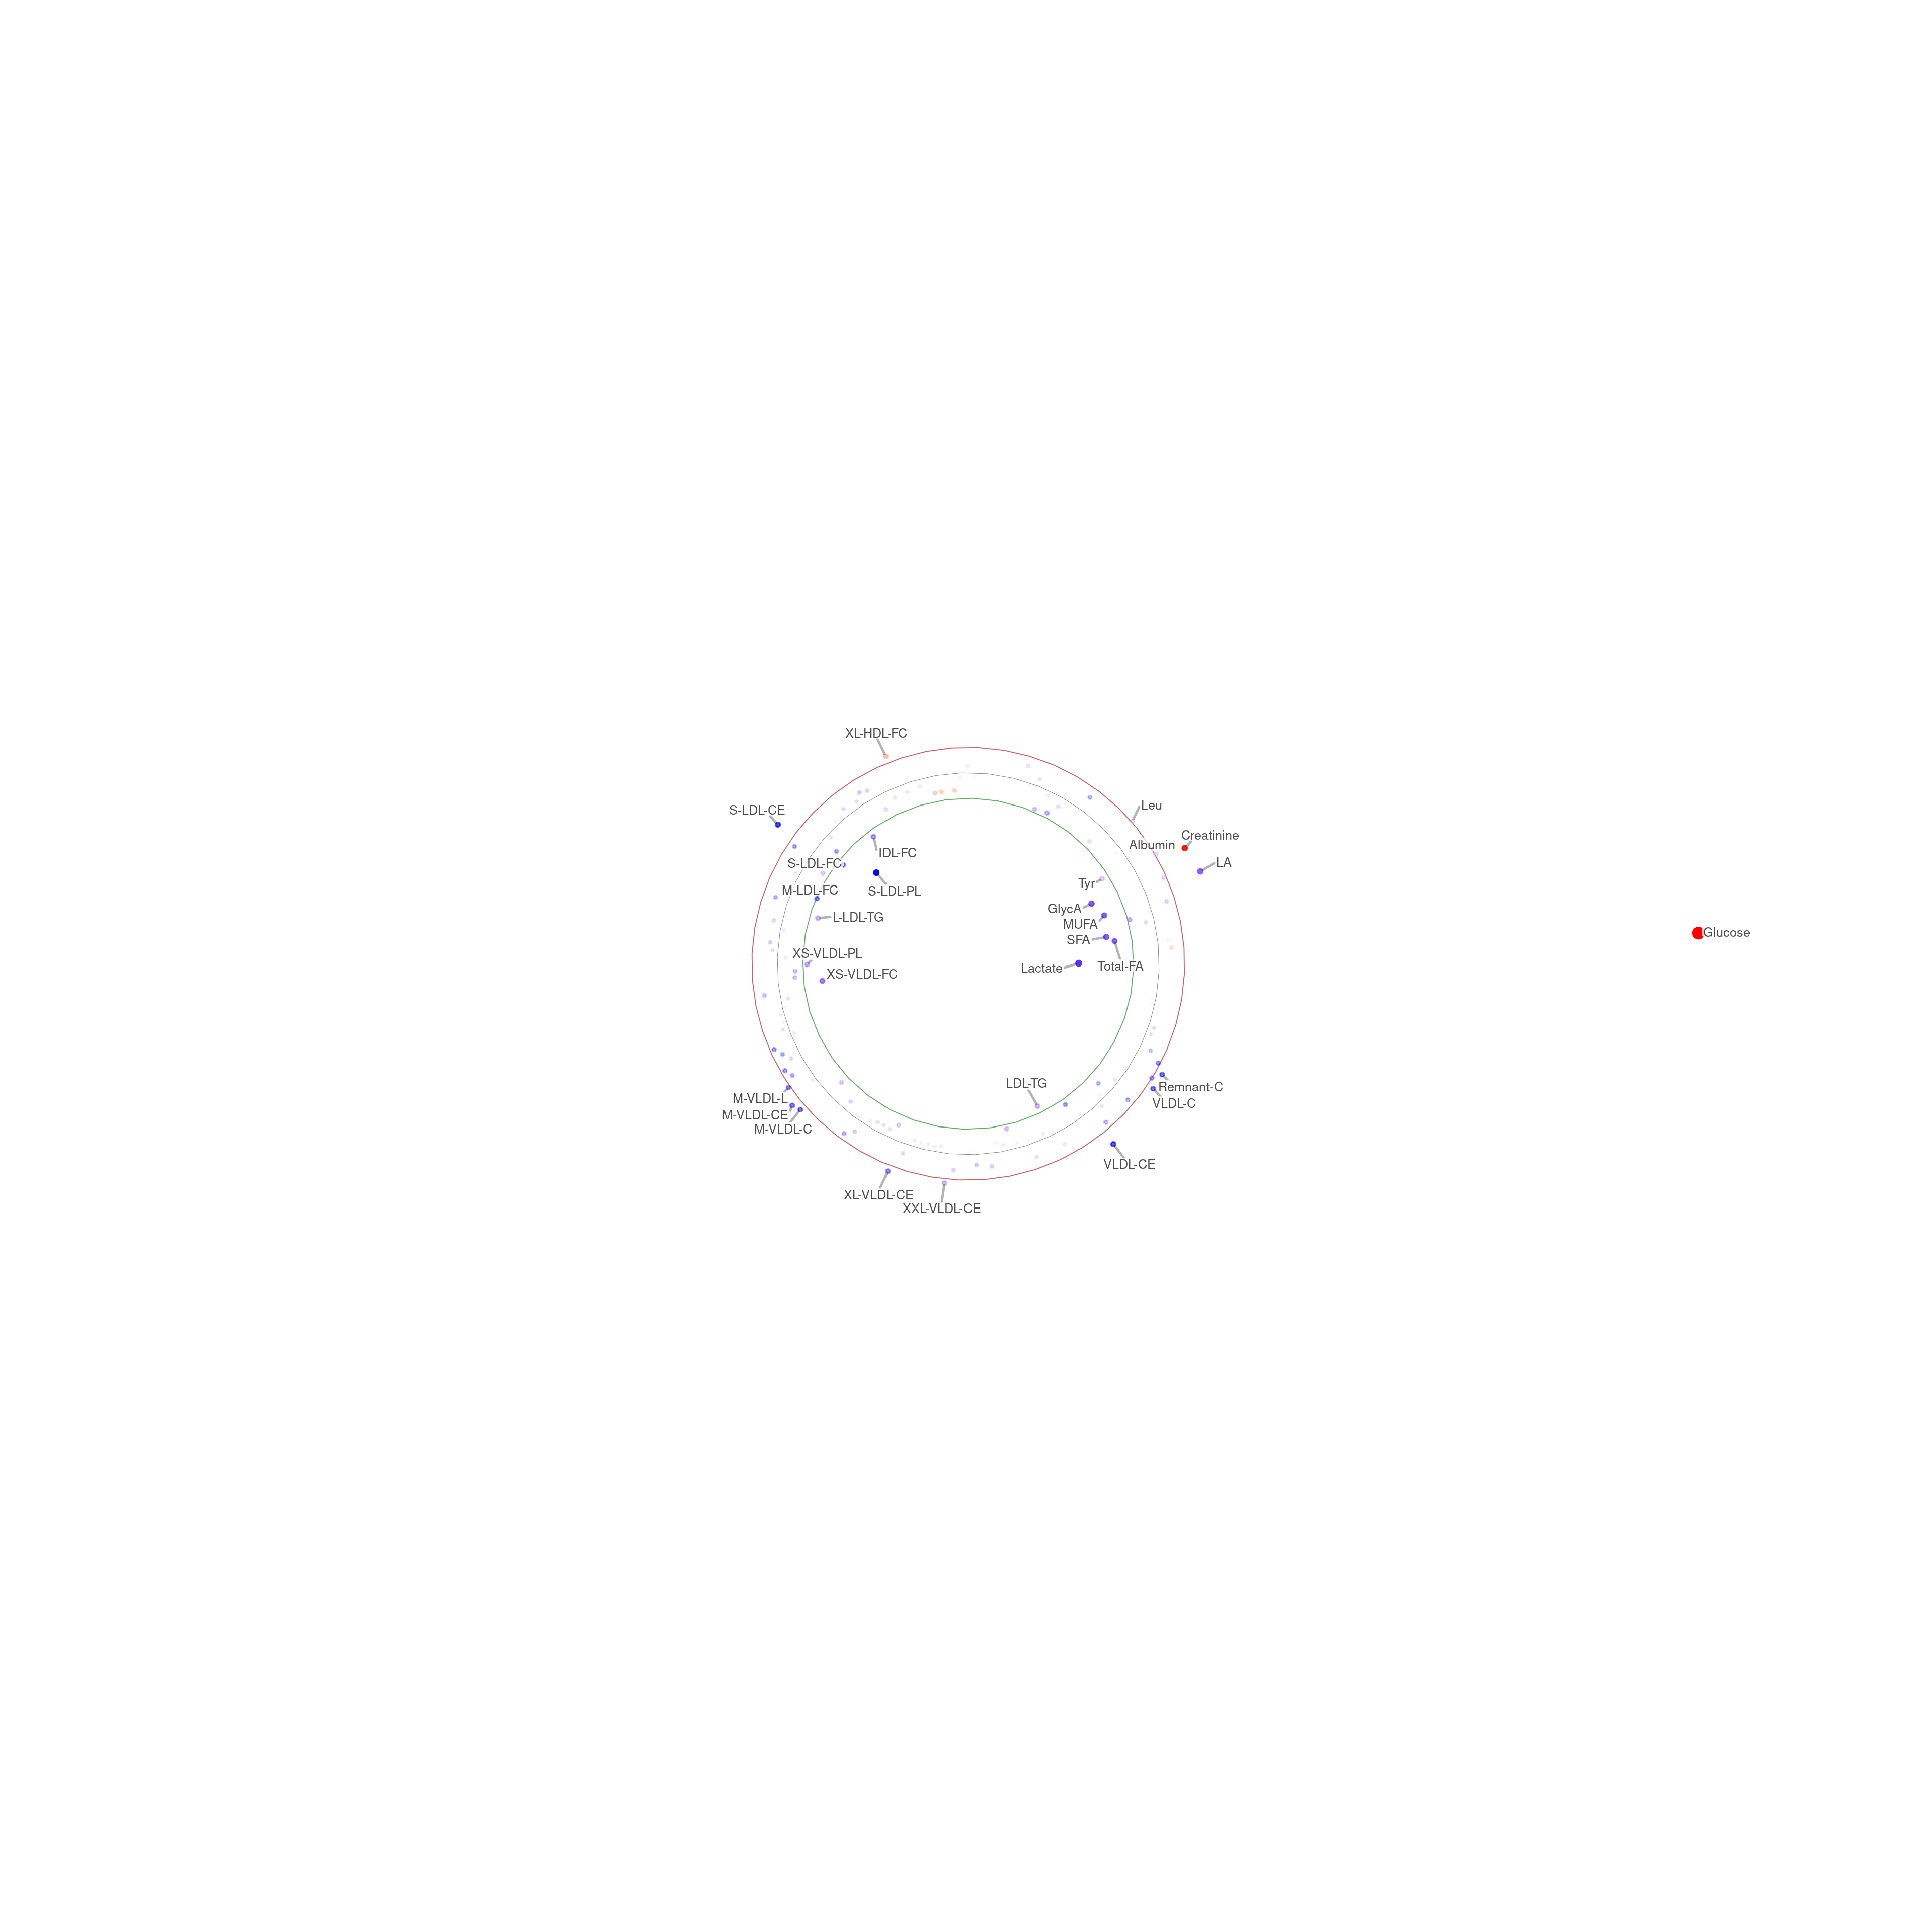

In [137]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
set.seed(5)
n_eids = 1
clamp_shap = 2
eids = (attrib_sample %>% filter(eid %in% eids_A$eid) %>% ungroup() %>% select(eid) %>% distinct() %>% sample_n(n_eids))$eid
eids = c("2475864")
temp = attrib_A %>% filter(eid %in% eids) %>% filter(eid %in% eids) %>% mutate(ymin=-0.2, ymax=+0.2) %>% 
    mutate(metabolite = factor(metabolite, levels=metabolite_order)) %>% arrange(metabolite) %>% ungroup() %>% 
    mutate(n = row_number()-1) %>% mutate(angle_prep = ((n)/n())*360) %>% 
    mutate(side = case_when((angle_prep>0&angle_prep<=180) ~ "right", (angle_prep>180&angle_prep<=360) ~ "left")) %>%
    mutate(angle = case_when(side=="right" ~ 90-angle_prep, side=="left" ~ 270-angle_prep)) 
    #mutate(angle = case_when(side=="right" ~ 90-angle_prep, side=="left" ~ 270-angle_prep)) 
print(eids)

attr_cA = ggplot(temp, aes(x=metabolite, y=shap, color=met_value)) + 
    geom_hline(yintercept=0, alpha=0.5, size=0.1, color="black")+
    geom_hline(yintercept=-0.2, alpha=0.7, size=0.2, color="forestgreen")+
    geom_hline(yintercept=+0.2, alpha=0.7, size=0.2, color="firebrick")+
    geom_point(aes(size=abs(shap)*100, alpha=abs(shap)), shape=19)+scale_size(range = c(0.05,2))+#, alpha=fct_rev(factor(event)))) +
    scale_alpha(range=c(0, 1), limits=c(0, 0.5), oob=scales::squish) +
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-2, +2), oob=scales::squish) +
    #geom_ribbon(aes(ymin=ymin, ymax=ymax), color=NA, group=1, alpha=0.01, size=0.1)+
    coord_polar(start=0.65, clip="off")+ 
    ylim(-1.5,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+

    geom_label_repel(data = temp %>% filter(shap>0.2),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2,  
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=0.2, force=2, force_pull=5, max.time=5, ylim=c(0.5, Inf),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    geom_label_repel(data = temp %>% filter(shap<(-0.2)),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2, 
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=-0.2, force=5, force_pull=5, max.time=5, ylim=c(-Inf, -0.2),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    theme(strip.text.y = element_blank(), axis.line=element_blank(), panel.spacing = unit(0, "lines"))
attr_cA

In [138]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Suppl_Figures_8_IndividualAttributions_C_A"
attr_cA %>% ggsave(filename=glue("outputs/{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)
attr_cA %>% ggsave(filename=glue("outputs/{plot_name}.png"), device=png, width=plot_width, height=plot_height, dpi=320)

[1] "1239178"


Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



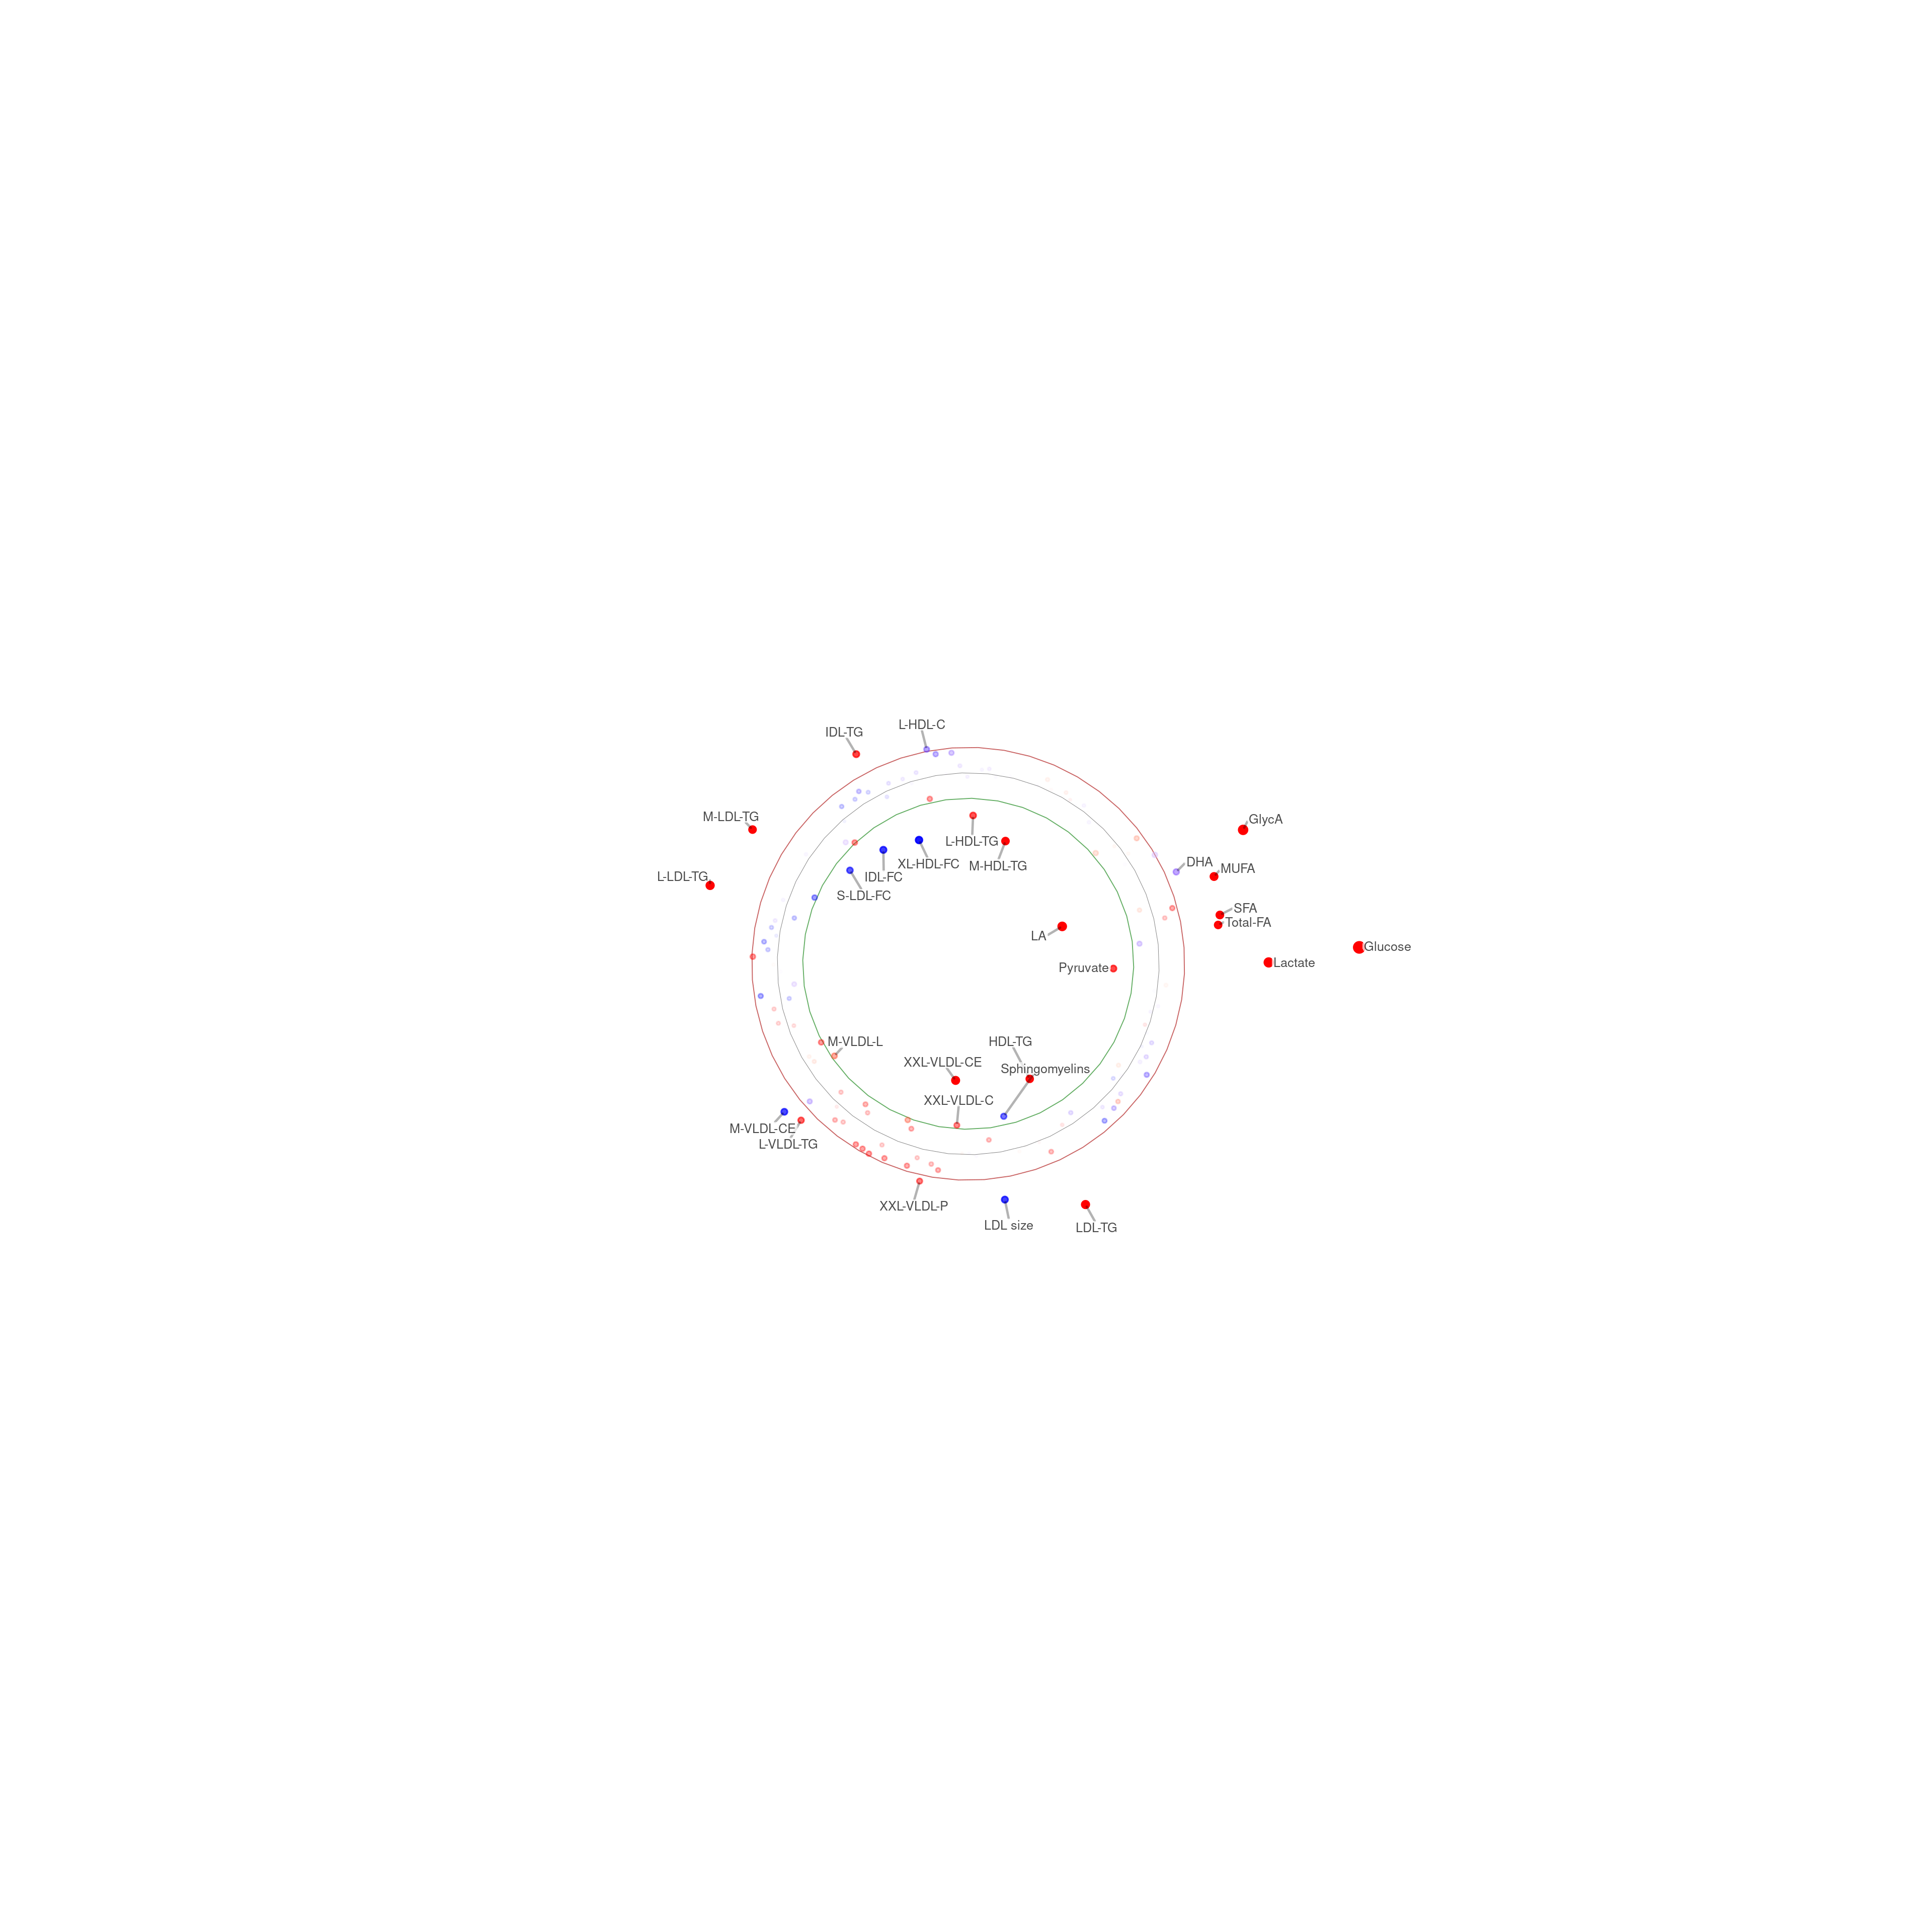

In [139]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
set.seed(5)
n_eids = 1
clamp_shap = 2
eids = (attrib_sample %>% filter(eid %in% eids_B$eid) %>% ungroup() %>% select(eid) %>% distinct() %>% sample_n(n_eids))$eid
eids = c("1239178")
temp = attrib_B %>% filter(eid %in% eids) %>% filter(eid %in% eids) %>% mutate(ymin=-0.2, ymax=+0.2) %>% 
    mutate(metabolite = factor(metabolite, levels=metabolite_order)) %>% arrange(metabolite) %>% ungroup() %>% 
    mutate(n = row_number()-1) %>% mutate(angle_prep = ((n)/n())*360) %>% 
    mutate(side = case_when((angle_prep>0&angle_prep<=180) ~ "right", (angle_prep>180&angle_prep<=360) ~ "left")) %>%
    mutate(angle = case_when(side=="right" ~ 90-angle_prep, side=="left" ~ 270-angle_prep)) 
print(eids)

attr_cB = ggplot(temp, aes(x=metabolite, y=shap, color=met_value)) + 
        geom_hline(yintercept=0, alpha=0.5, size=0.1, color="black")+
    geom_hline(yintercept=-0.2, alpha=0.7, size=0.2, color="forestgreen")+
    geom_hline(yintercept=+0.2, alpha=0.7, size=0.2, color="firebrick")+
    geom_point(aes(size=abs(shap)*100, alpha=abs(shap)), shape=19)+scale_size(range = c(0.05,2))+#, alpha=fct_rev(factor(event)))) +
    scale_alpha(range=c(0, 1), limits=c(0, 0.5), oob=scales::squish) +
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-2, +2), oob=scales::squish) +
    #geom_ribbon(aes(ymin=ymin, ymax=ymax), color=NA, group=1, alpha=0.01, size=0.1)+
    coord_polar(start=0.65, clip="off")+ 
    ylim(-1.5,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+

    geom_label_repel(data = temp %>% filter(shap>0.2),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2,  
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=0.2, force=2, force_pull=5, max.time=5, ylim=c(0.5, Inf),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    geom_label_repel(data = temp %>% filter(shap<(-0.2)),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2, 
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=-0.2, force=5, force_pull=5, max.time=5, ylim=c(-Inf, -0.2),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cB

In [140]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Suppl_Figures_8_IndividualAttributions_C_B"
attr_cB %>% ggsave(filename=glue("outputs/{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)
attr_cB %>% ggsave(filename=glue("outputs/{plot_name}.png"), device=png, width=plot_width, height=plot_height, dpi=320)

[1] "1690024"


Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



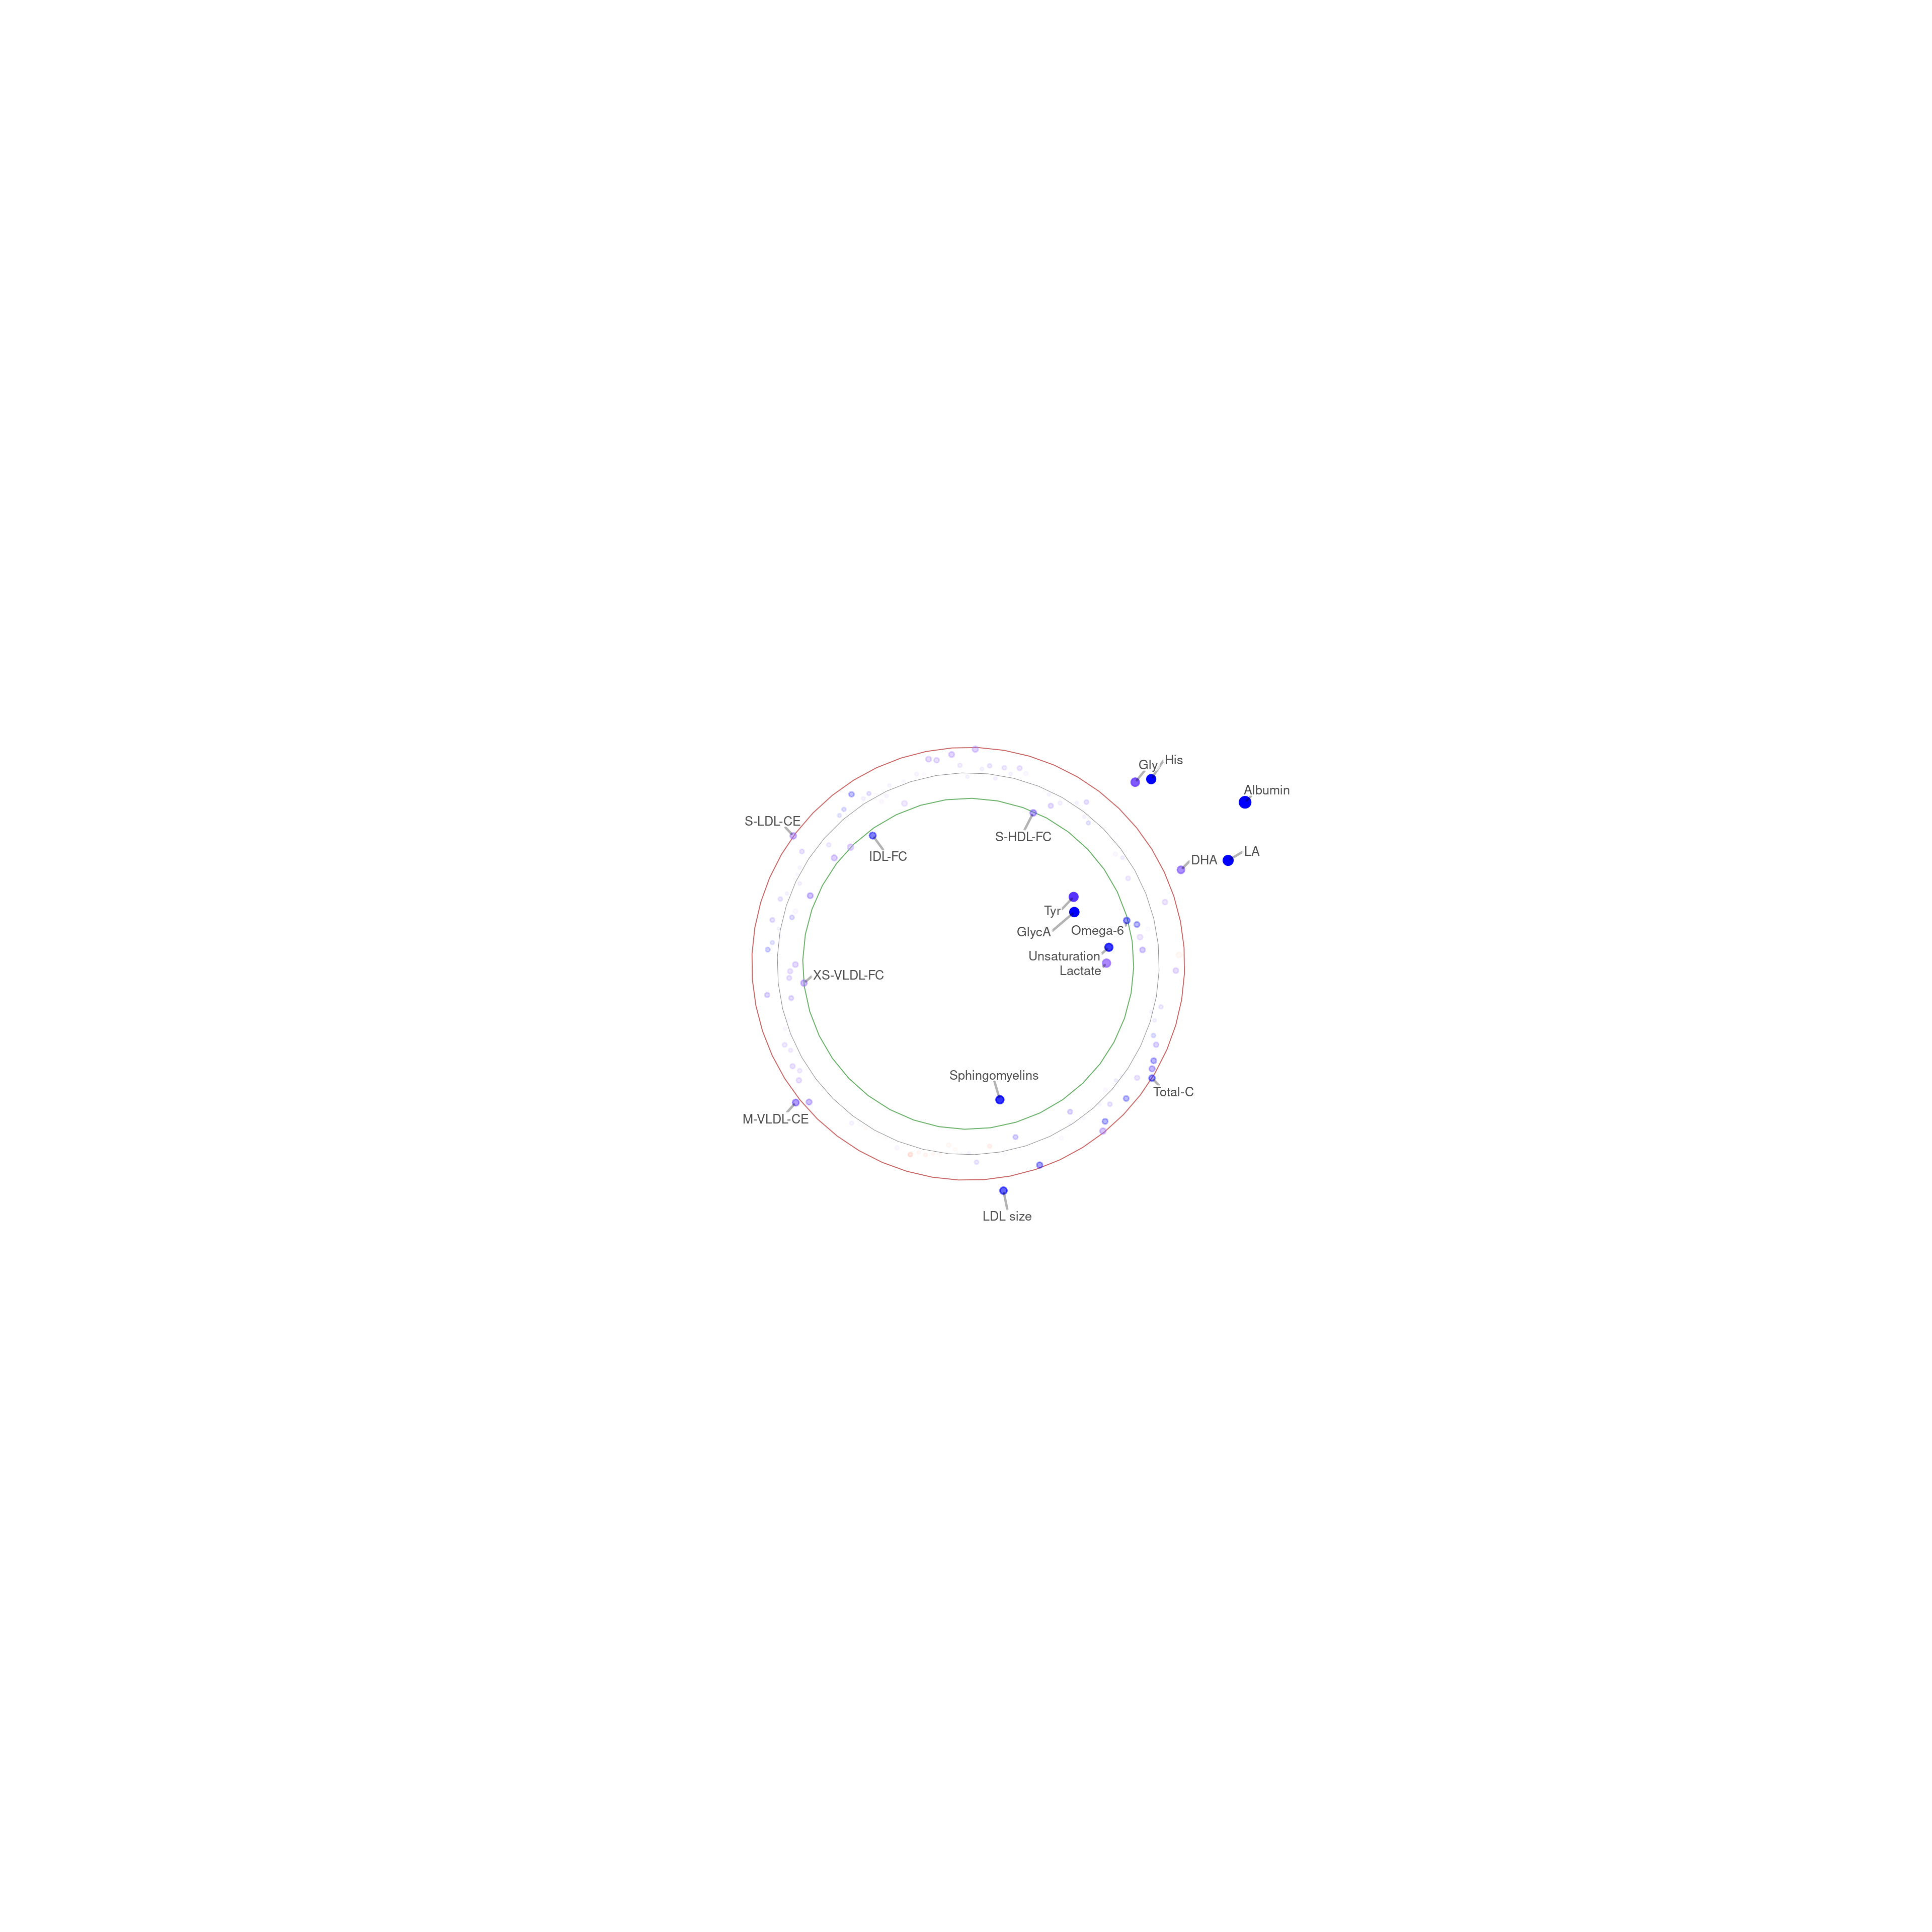

In [141]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
set.seed(5)
n_eids = 1
clamp_shap = 2
eids = (attrib_sample %>% filter(eid %in% eids_C$eid) %>% ungroup() %>% select(eid) %>% distinct() %>% sample_n(n_eids))$eid
eids = c("1690024")
temp = attrib_C %>% filter(eid %in% eids)  %>% filter(eid %in% eids) %>% mutate(ymin=-0.2, ymax=+0.2) %>% mutate(metabolite = factor(metabolite, levels=metabolite_order))
print(eids)

attr_cC =ggplot(temp, aes(x=metabolite, y=shap, color=met_value)) + 
        geom_hline(yintercept=0, alpha=0.5, size=0.1, color="black")+
    geom_hline(yintercept=-0.2, alpha=0.7, size=0.2, color="forestgreen")+
    geom_hline(yintercept=+0.2, alpha=0.7, size=0.2, color="firebrick")+
    geom_point(aes(size=abs(shap)*100, alpha=abs(shap)), shape=19)+scale_size(range = c(0.05,2))+#, alpha=fct_rev(factor(event)))) +
    scale_alpha(range=c(0, 1), limits=c(0, 0.5), oob=scales::squish) +
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-2, +2), oob=scales::squish) +
    #geom_ribbon(aes(ymin=ymin, ymax=ymax), color=NA, group=1, alpha=0.01, size=0.1)+
    coord_polar(start=0.65, clip="off")+ 
    ylim(-1.5,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+

    geom_label_repel(data = temp %>% filter(shap>0.2),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2,  
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=0.2, force=2, force_pull=5, max.time=5, ylim=c(0.5, Inf),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    geom_label_repel(data = temp %>% filter(shap<(-0.2)),
                    aes(x=metabolite, y=shap, label=glue("{abbreviation}")), size=2, 
                     label.size=0.0, label.padding=0.05, alpha=0.7, color="black", max.overlaps=100, box.padding=0, 
                     direction="both", nudge_y=-0.2, force=5, force_pull=5, max.time=5, ylim=c(-Inf, -0.2),
                     segment.size=0.5, segment.shape=1, min.segment.length = 0.05, segment.ncp = 3, segment.alpha=0.3, segment.color="black") +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cC

In [142]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Suppl_Figures_8_IndividualAttributions_C_C"
attr_cC %>% ggsave(filename=glue("outputs/{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)
attr_cC %>% ggsave(filename=glue("outputs/{plot_name}.png"), device=png, width=plot_width, height=plot_height, dpi=320)

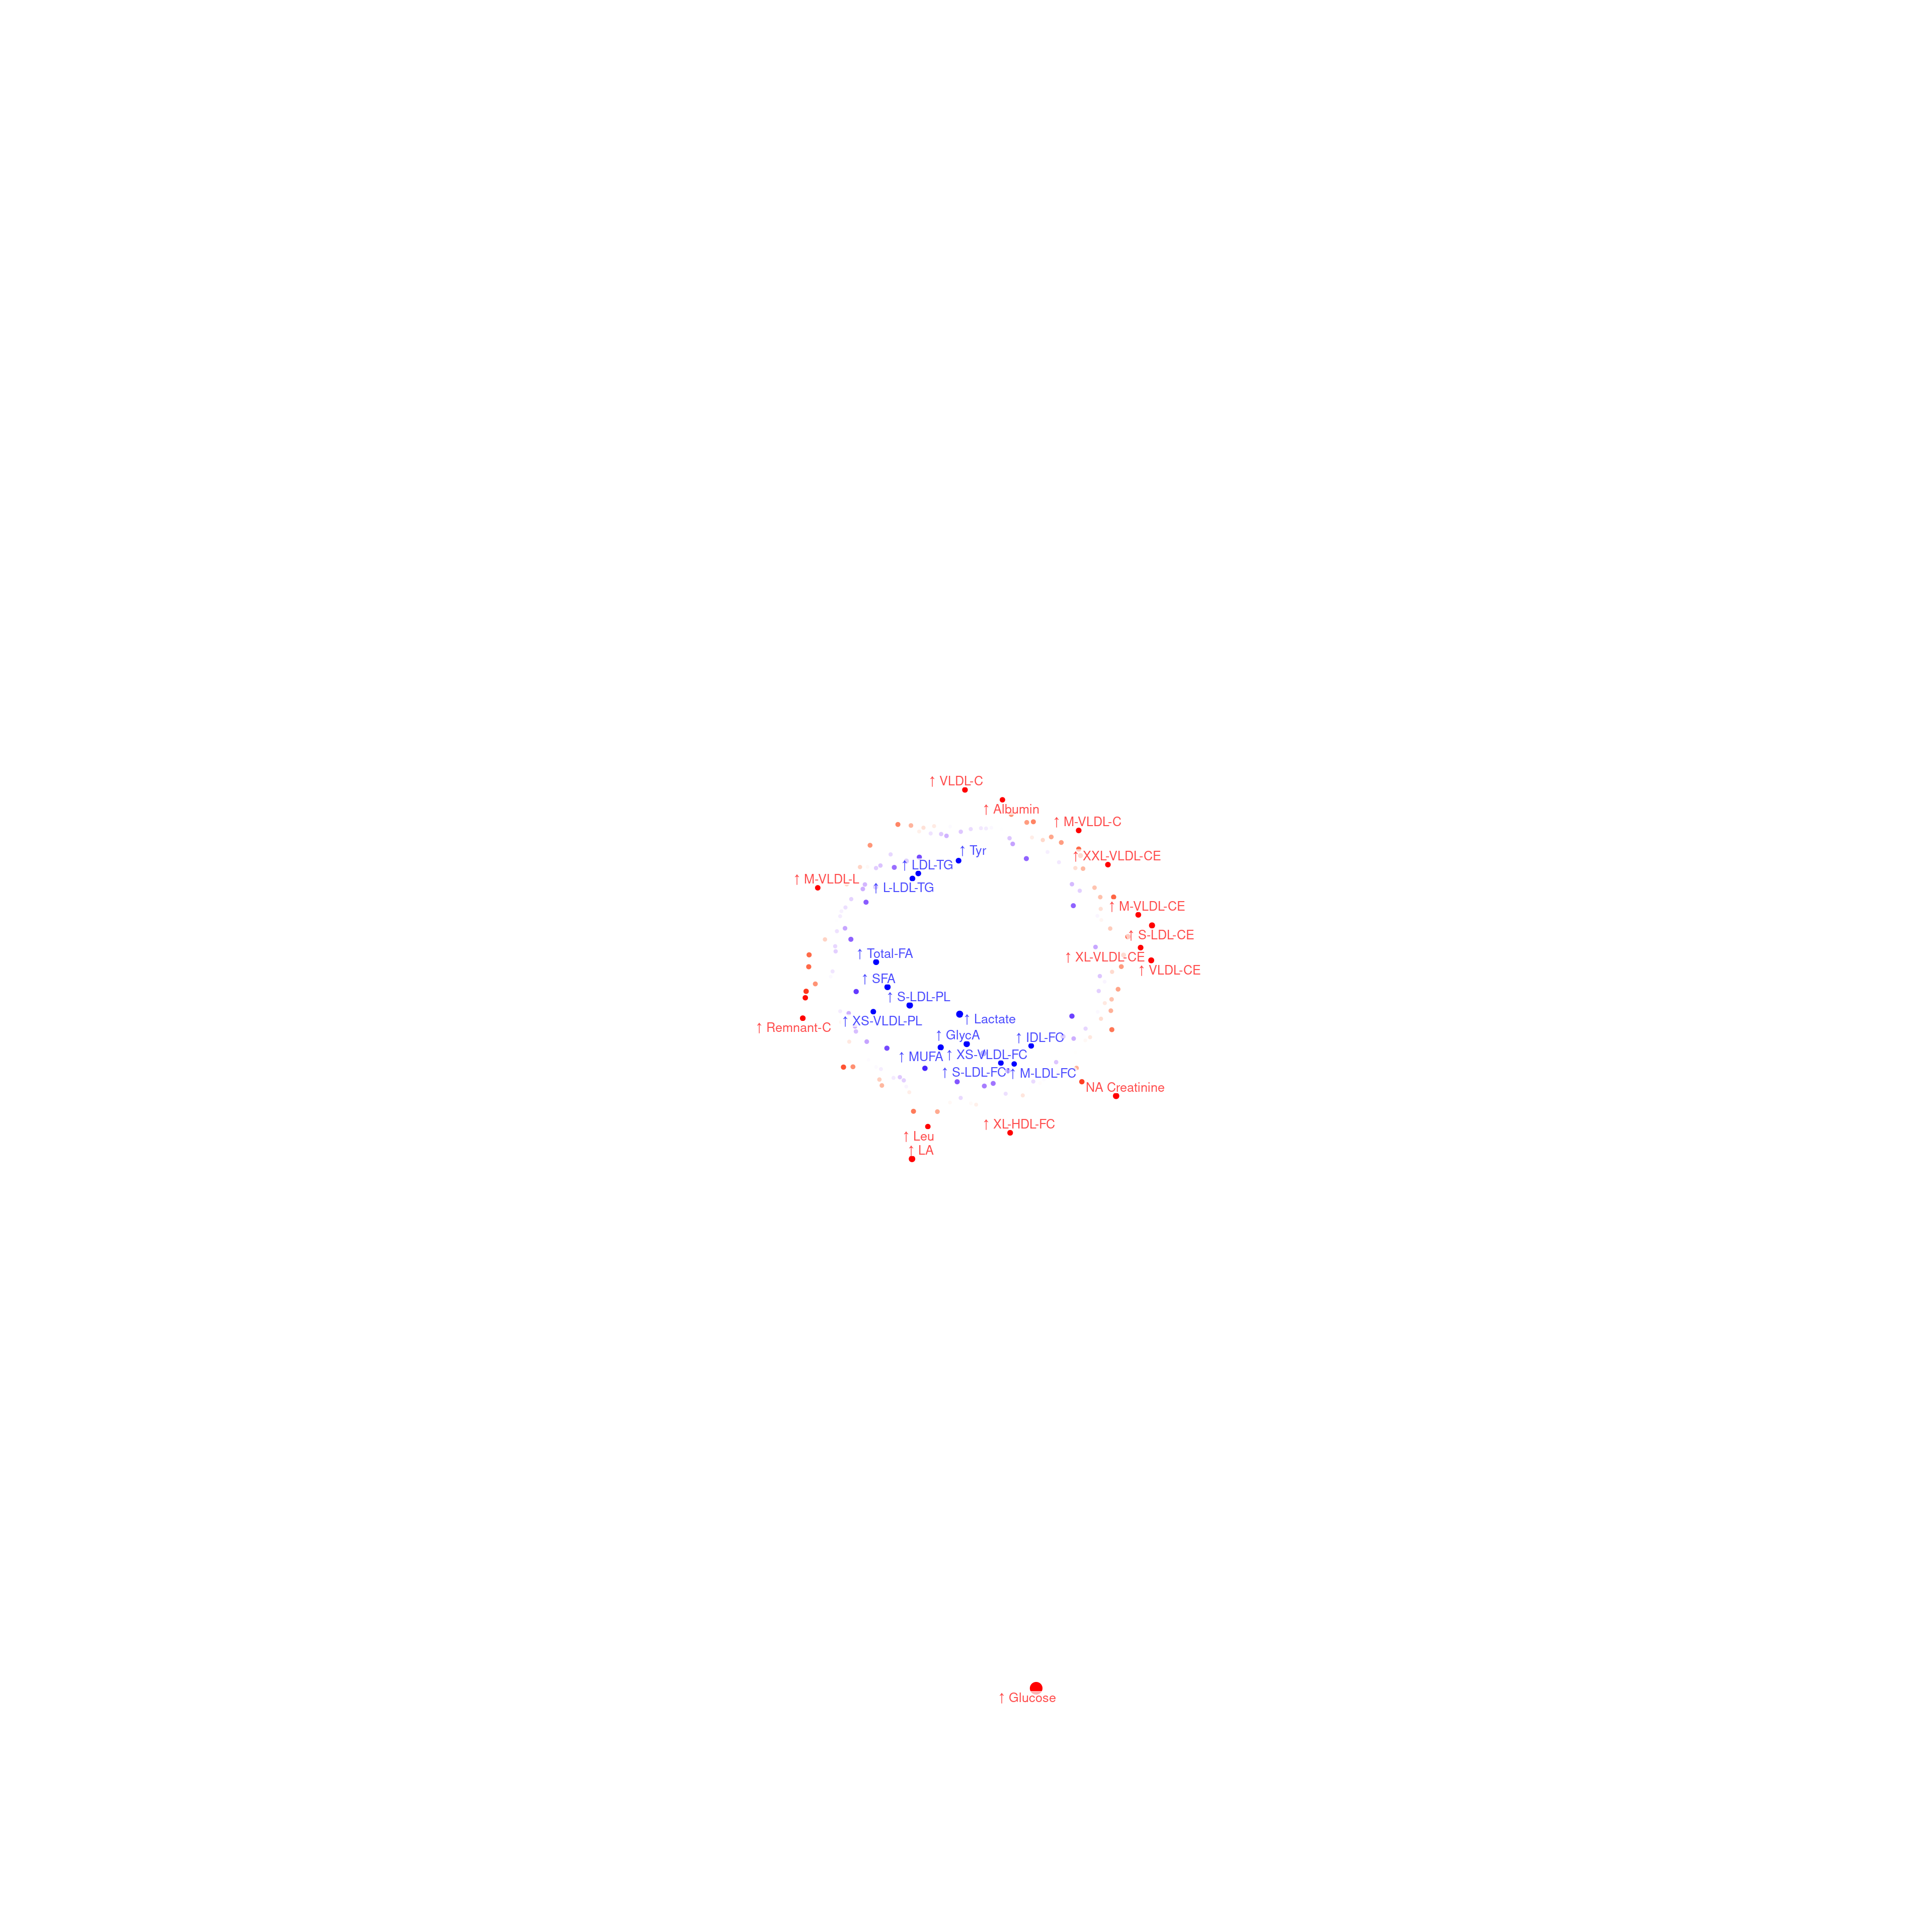

In [66]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
clamp_shap = 2
temp_ref = tempA
temp_shap = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("shap_"), names_to="metabolite", values_to="shap") %>% mutate(metabolite = str_remove_all(metabolite, "shap_")) 
temp_NMR = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("NMR_"), names_to="metabolite", values_to="met_value") %>% mutate(metabolite = str_remove_all(metabolite, "NMR_")) 

temp = temp_shap %>% left_join(temp_NMR %>% select(eid, metabolite, met_value), by=c("eid", "metabolite")) %>% left_join(mets, by="metabolite")

attr_cA = ggplot(temp, aes(x=metabolite, y=shap, color=shap)) + 
    geom_point(aes(size=abs(shap)*100))+#, alpha=fct_rev(factor(event)))) + 
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-0.2, +0.2), oob=scales::squish) +
    coord_polar(start=0, clip="off")+ ylim(-1,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+
     geom_label_repel(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
                     aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=2, label.size=0.0, label.padding=0.05, alpha=0.7, max.overlaps=100, box.padding=0, direction="both") +
     #geom_label(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
     #                aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=3, alpha=0.7, max.overlaps=100, hjust=0) +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cA

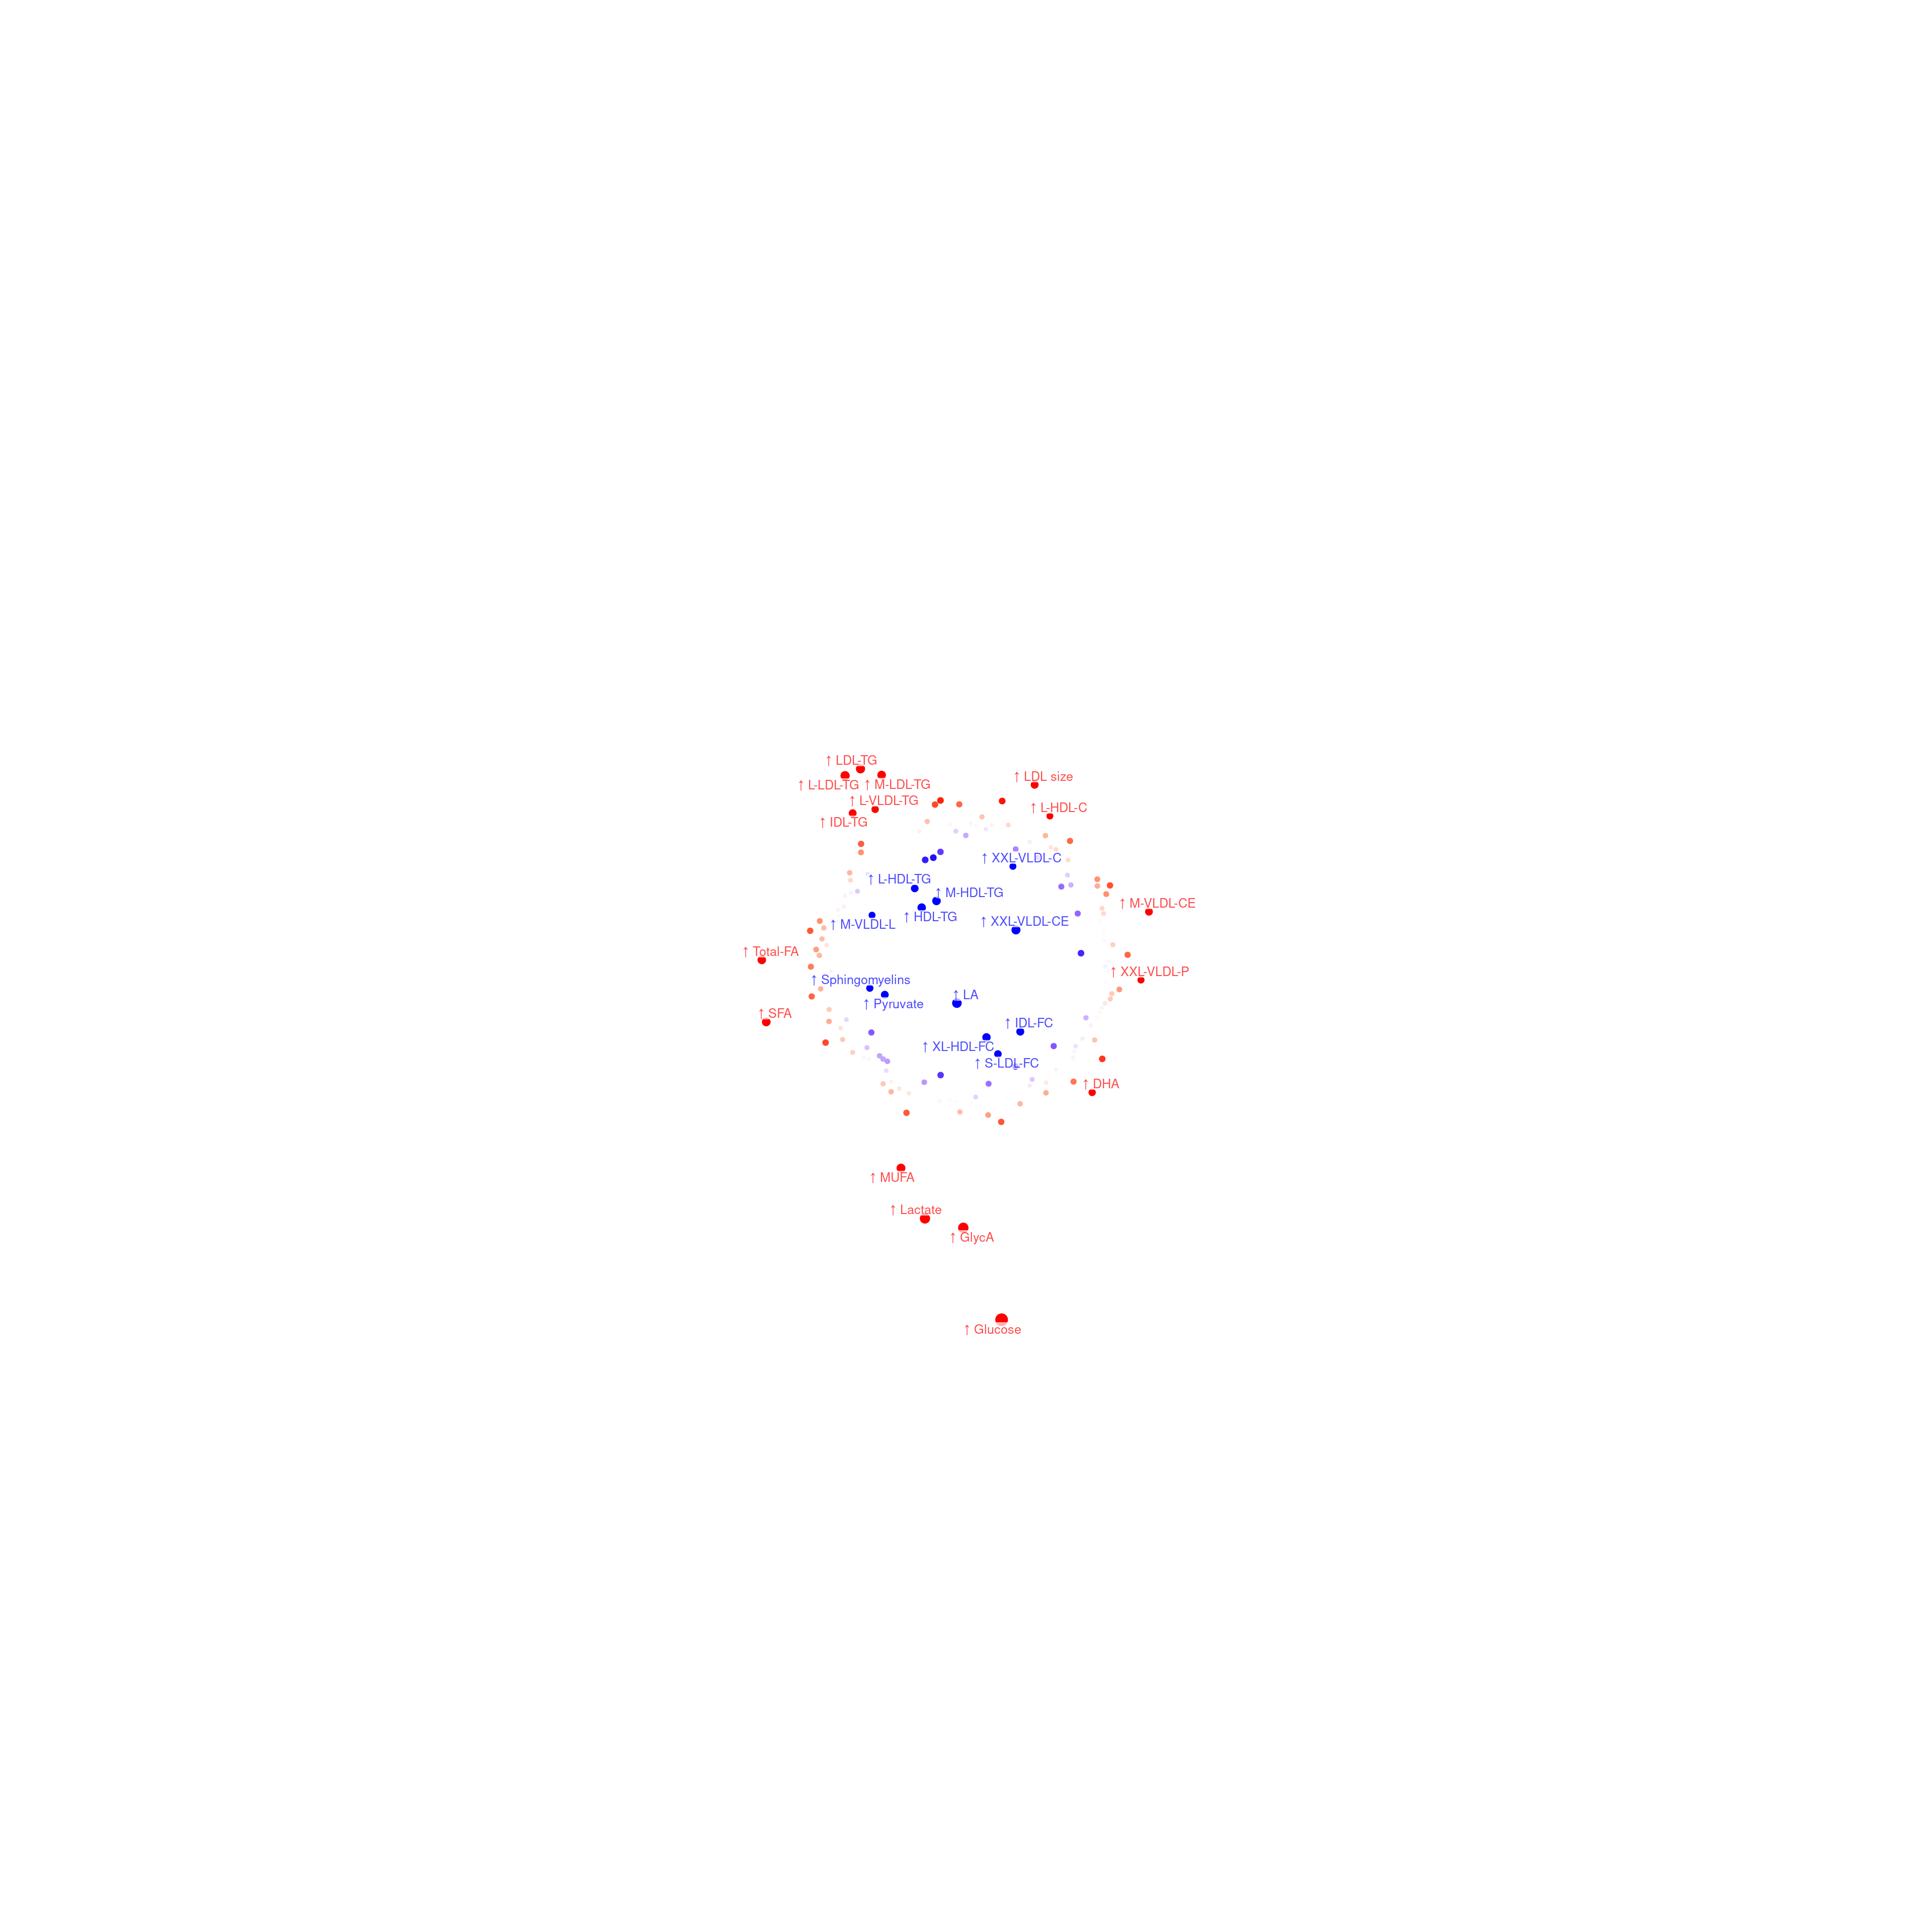

In [67]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
clamp_shap = 2
temp_ref = tempB
temp_shap = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("shap_"), names_to="metabolite", values_to="shap") %>% mutate(metabolite = str_remove_all(metabolite, "shap_")) 
temp_NMR = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("NMR_"), names_to="metabolite", values_to="met_value") %>% mutate(metabolite = str_remove_all(metabolite, "NMR_")) 

temp = temp_shap %>% left_join(temp_NMR %>% select(eid, metabolite, met_value), by=c("eid", "metabolite")) %>% left_join(mets, by="metabolite")

attr_cB = ggplot(temp, aes(x=metabolite, y=shap, color=shap)) + 
    geom_point(aes(size=abs(shap)*100))+#, alpha=fct_rev(factor(event)))) + 
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-0.2, +0.2), oob=scales::squish) +
    coord_polar(start=0, clip="off")+ ylim(-1,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+
     geom_label_repel(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
                     aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=2, label.size=0.0, label.padding=0.05, alpha=0.7, max.overlaps=100, box.padding=0, direction="both") +
     #geom_label(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
     #                aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=3, alpha=0.7, max.overlaps=100, hjust=0) +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cB

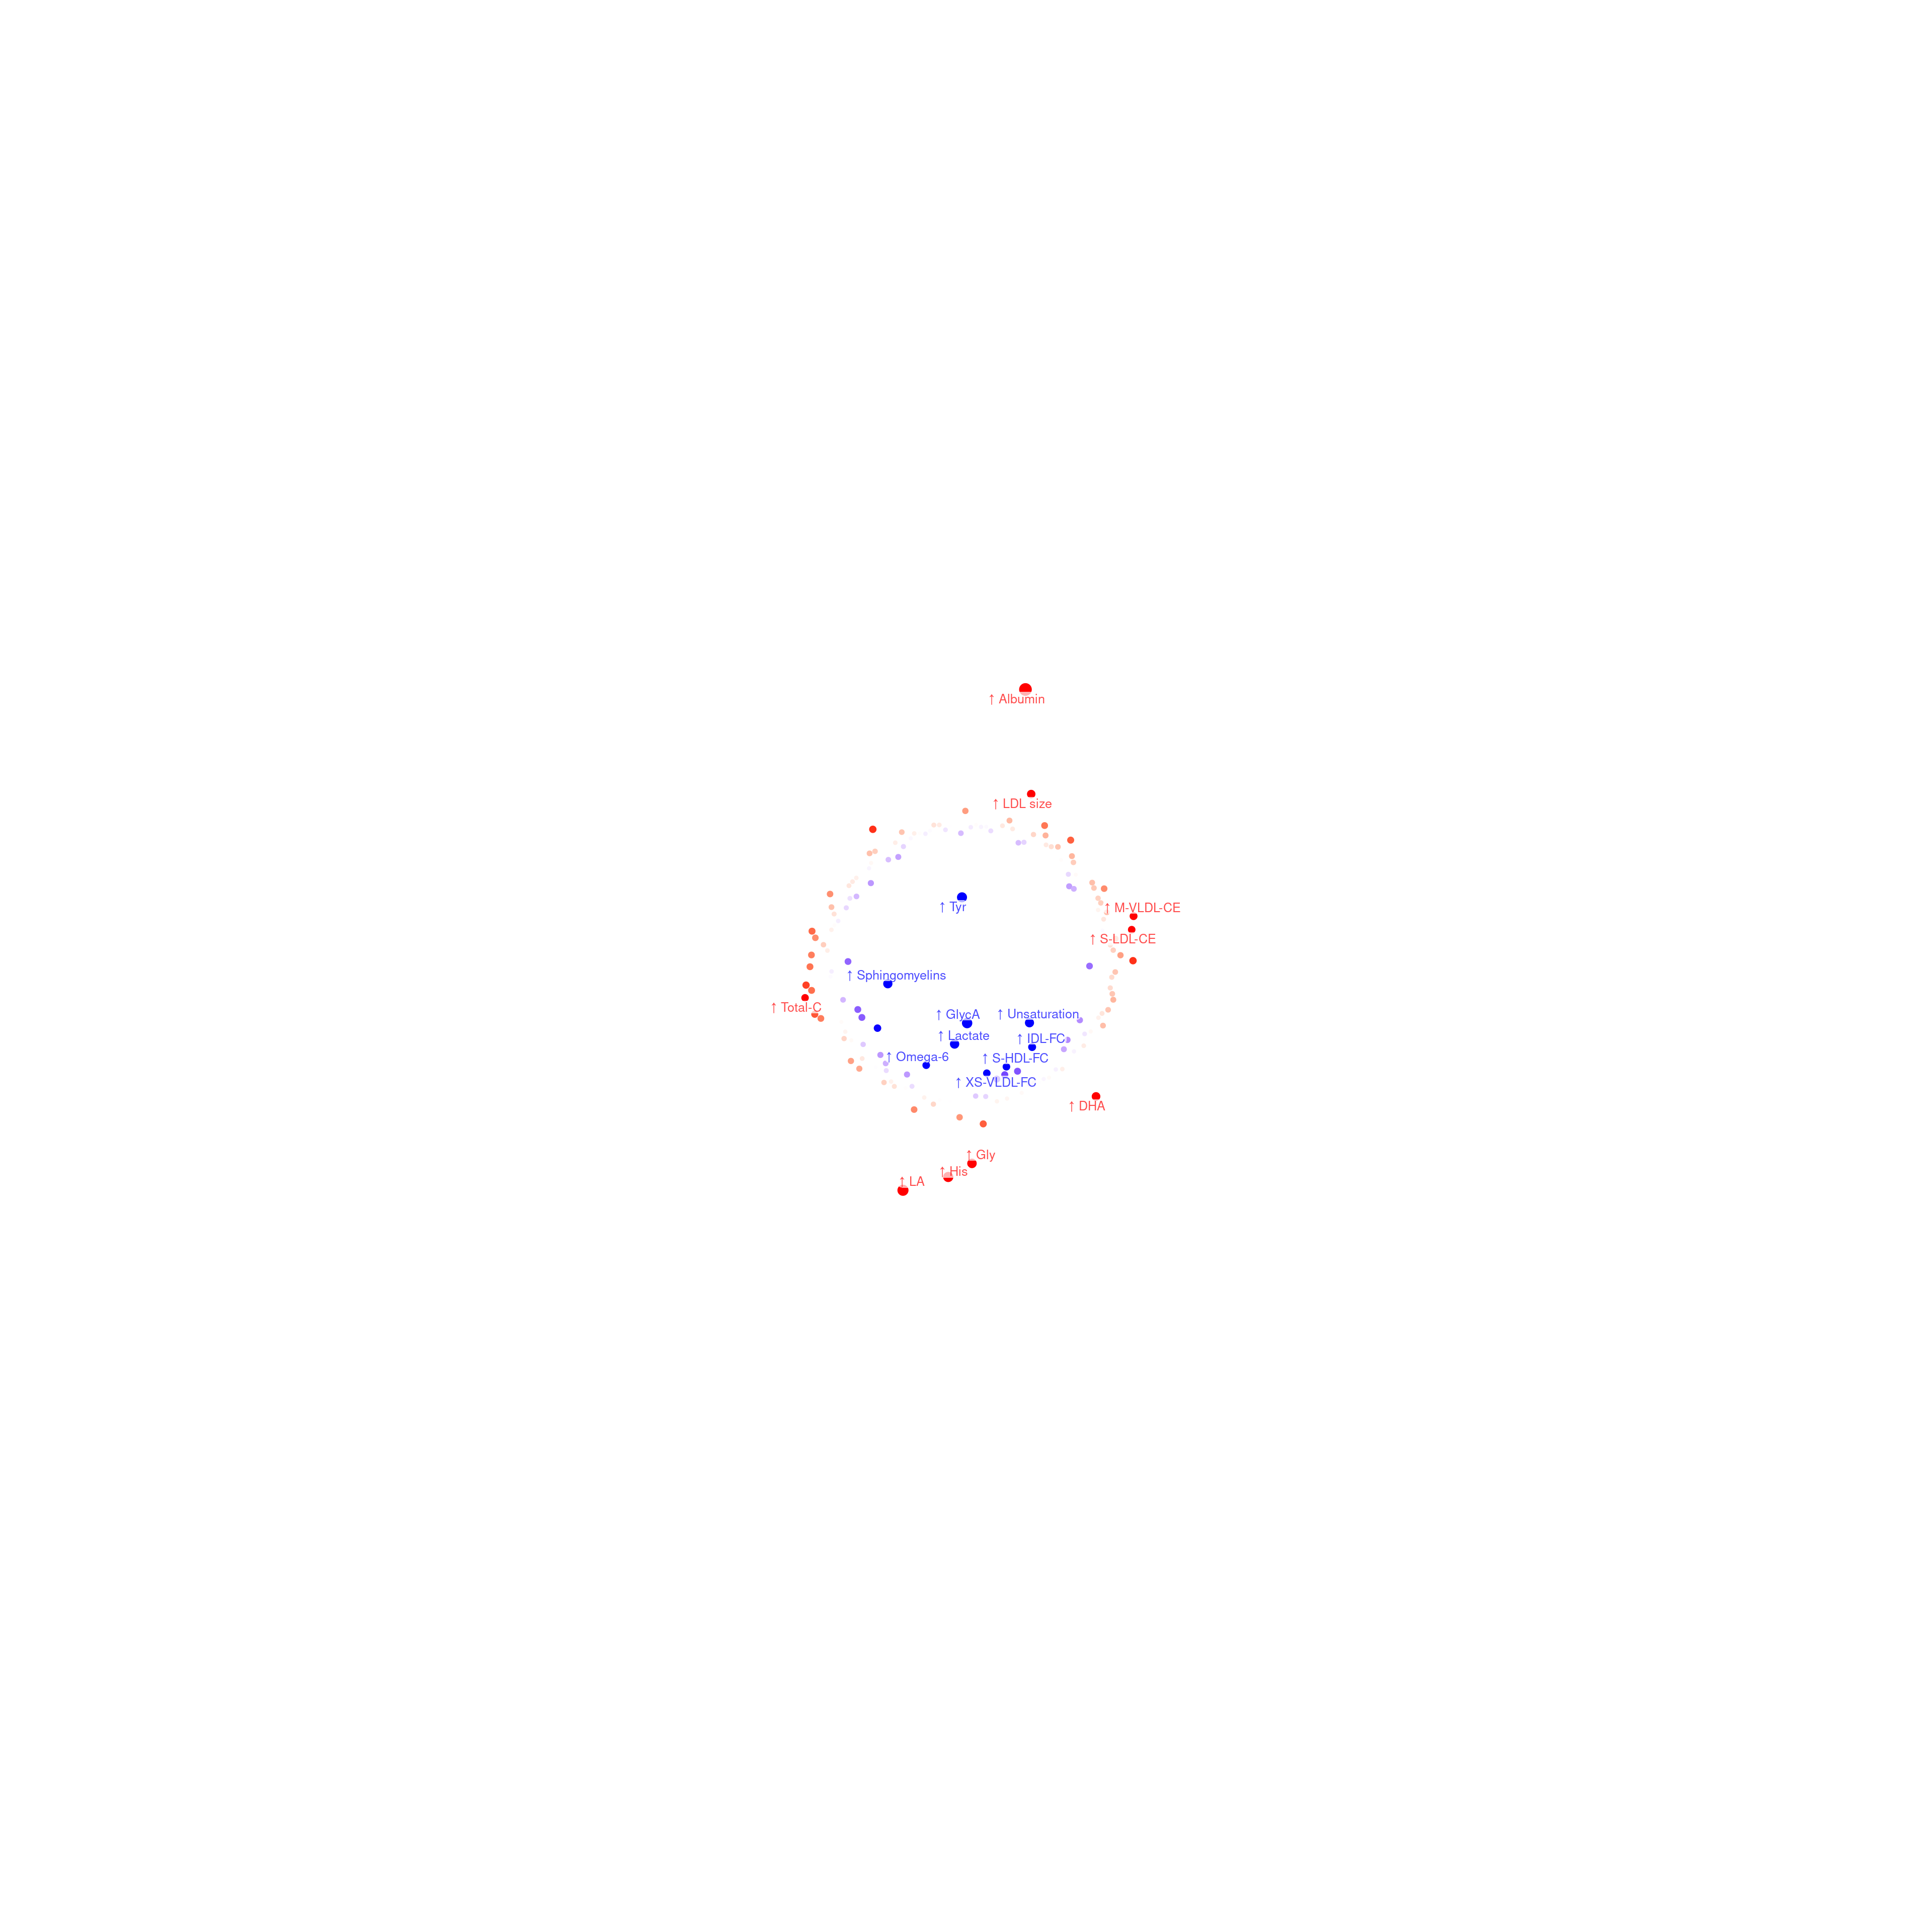

In [68]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
clamp_shap = 2
temp_ref = tempC
temp_shap = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("shap_"), names_to="metabolite", values_to="shap") %>% mutate(metabolite = str_remove_all(metabolite, "shap_")) 
temp_NMR = temp_ref %>% select(-NMR_measurement_quality_flagged, -NMR_spectrometer) %>% 
    pivot_longer(starts_with("NMR_"), names_to="metabolite", values_to="met_value") %>% mutate(metabolite = str_remove_all(metabolite, "NMR_")) 

temp = temp_shap %>% left_join(temp_NMR %>% select(eid, metabolite, met_value), by=c("eid", "metabolite")) %>% left_join(mets, by="metabolite")

attr_cC = ggplot(temp, aes(x=metabolite, y=shap, color=shap)) + 
    geom_point(aes(size=abs(shap)*100))+#, alpha=fct_rev(factor(event)))) + 
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-0.2, +0.2), oob=scales::squish) +
    coord_polar(start=0, clip="off")+ ylim(-1,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+
     geom_label_repel(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
                     aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=2, label.size=0.0, label.padding=0.05, alpha=0.7, max.overlaps=100, box.padding=0, direction="both") +
     #geom_label(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
     #                aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=3, alpha=0.7, max.overlaps=100, hjust=0) +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cC

In [69]:
temp

eid     x        y        endpoint          hr       event incident_event
1   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
2   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
3   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
4   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
5   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
6   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
7   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
8   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
9   1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
10  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
11  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
12  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
13  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
14  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
15  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
16  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
17  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
18  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
19  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
20  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
21  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
22  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
23  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
24  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
25  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
26  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
27  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
28  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
29  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
30  1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
⋮   ⋮       ⋮        ⋮        ⋮                 ⋮        ⋮     ⋮             
139 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
140 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
141 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
142 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
143 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
144 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
145 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
146 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
147 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
148 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
149 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
150 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
151 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
152 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
153 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
154 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
155 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
156 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
157 1690024 6.834453 10.91951 M_type_2_diabetes 10.26274 TRUE  TRUE          
158 1690024 6.834453 10.91

In [447]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_A"
attr_cA %>% ggsave(filename=glue("{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=320)

In [448]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_A"
attr_cA %>% ggsave(filename=glue("{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)

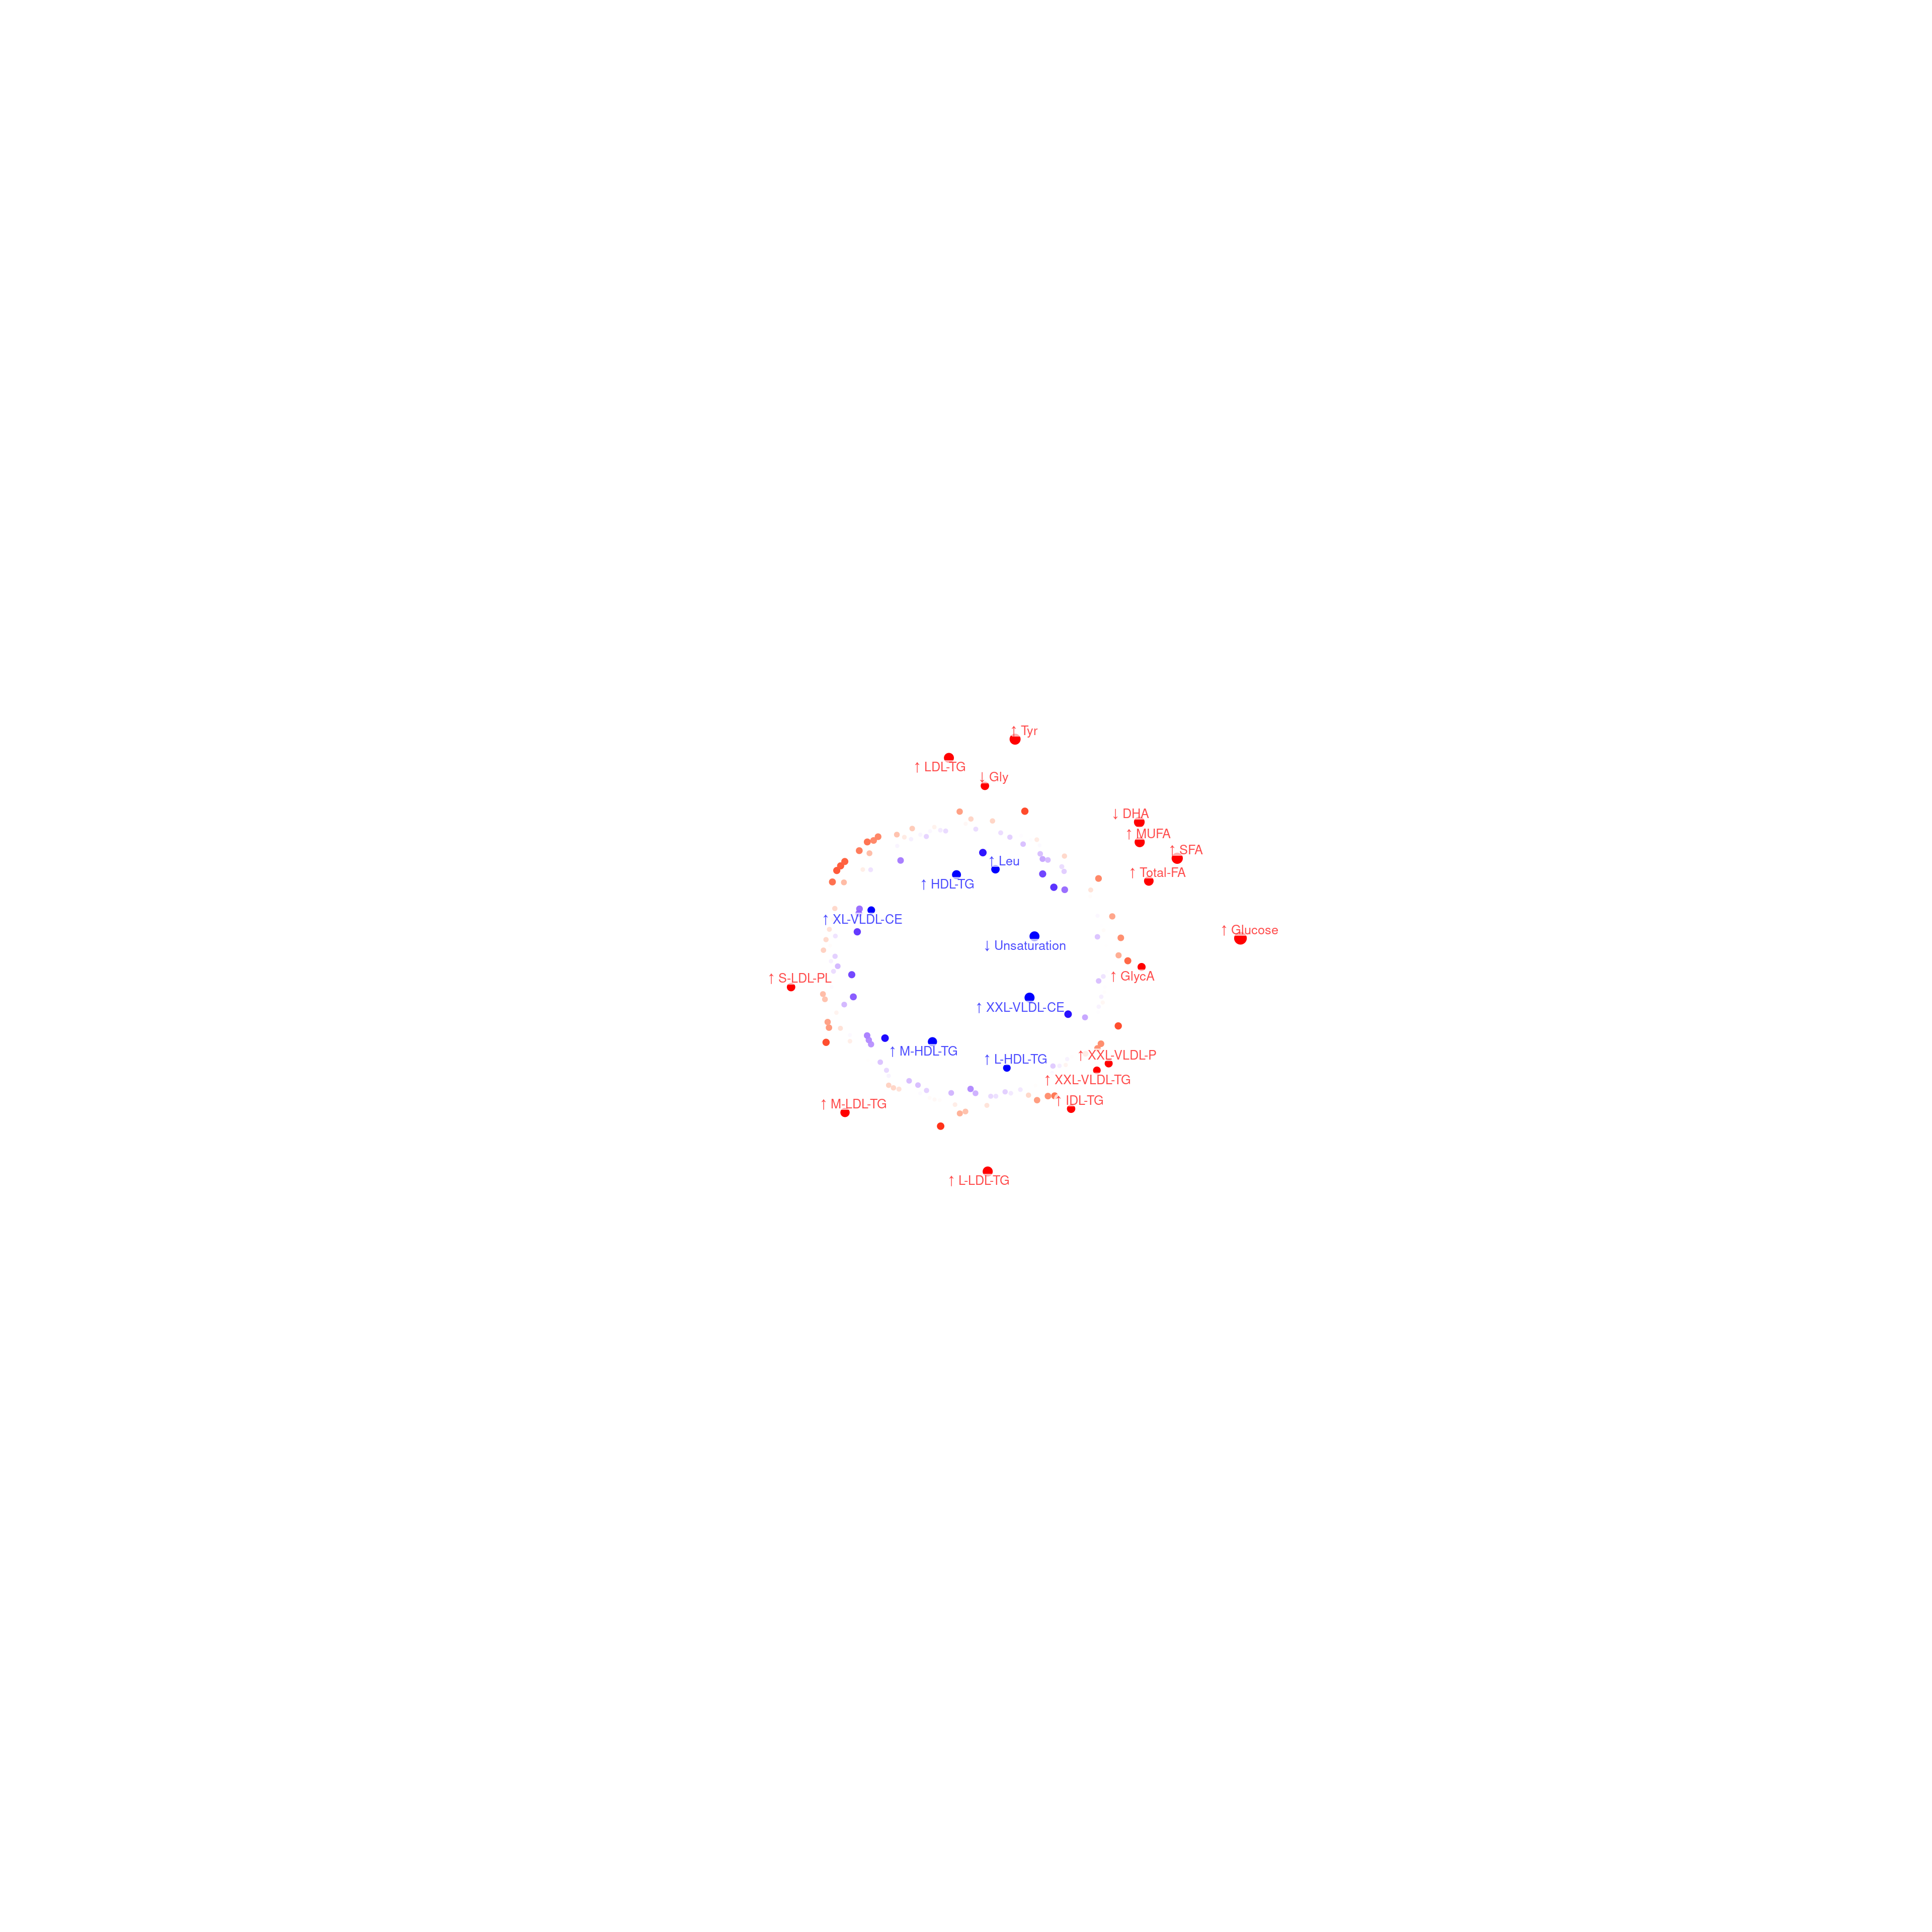

In [449]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
set.seed(5)
n_eids = 1
clamp_shap = 2
eids = (attrib_sample %>% filter(eid %in% eids_B$eid) %>% ungroup() %>% select(eid) %>% distinct() %>% sample_n(n_eids))$eid
#eids = c("1857858")
temp = attrib_B %>% filter(eid %in% eids) 

attr_cB = ggplot(temp, aes(x=metabolite, y=shap, color=shap)) + 
    geom_point(aes(size=abs(shap)*100))+#, alpha=fct_rev(factor(event)))) + 
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-0.2, +0.2), oob=scales::squish) +
    coord_polar(start=0, clip="off")+ ylim(-1,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+
    #facet_grid(rows=vars(eid), cols=vars(endpoint), labeller = labeller(endpoint = endpoint_map))+ #+
    #scale_y_continuous(expand=c(0, 0))+
    #gghighlight(max(shap), max_highlight=5L, label_key=metabolite, calculate_per_facet = TRUE)+ #+ 
    #geom_text(data=temp %>% ungroup() %>%
     #        group_by(eid, endpoint) %>% slice_head(n=1) %>% mutate(met_trans=log(hr)),
        #      summarise(hr = mean(hr), met_trans=log(mean(hr))), 
         #     mapping=aes(label=glue("RR:\n{round(hr, 2)}")), x=0, y=-1, size=3, color="black", alpha=0.7) + #x=-60, y=1.5,
    #geom_text(data=temp %>% select(eid, endpoint, event) %>% 
    #          distinct() %>% filter(event==TRUE), label="Prevalent", x=0, y=max_shap*1.3, size=5, color="red") + 
     geom_label_repel(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
                     aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=2, label.size=0.0, label.padding=0.05, alpha=0.7, max.overlaps=100, box.padding=0, direction="both") +
     #geom_label(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
     #                aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=3, alpha=0.7, max.overlaps=100, hjust=0) +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cB

In [450]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_B"
attr_cB %>% ggsave(filename=glue("{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=320)

In [451]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_B"
attr_cB %>% ggsave(filename=glue("{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)

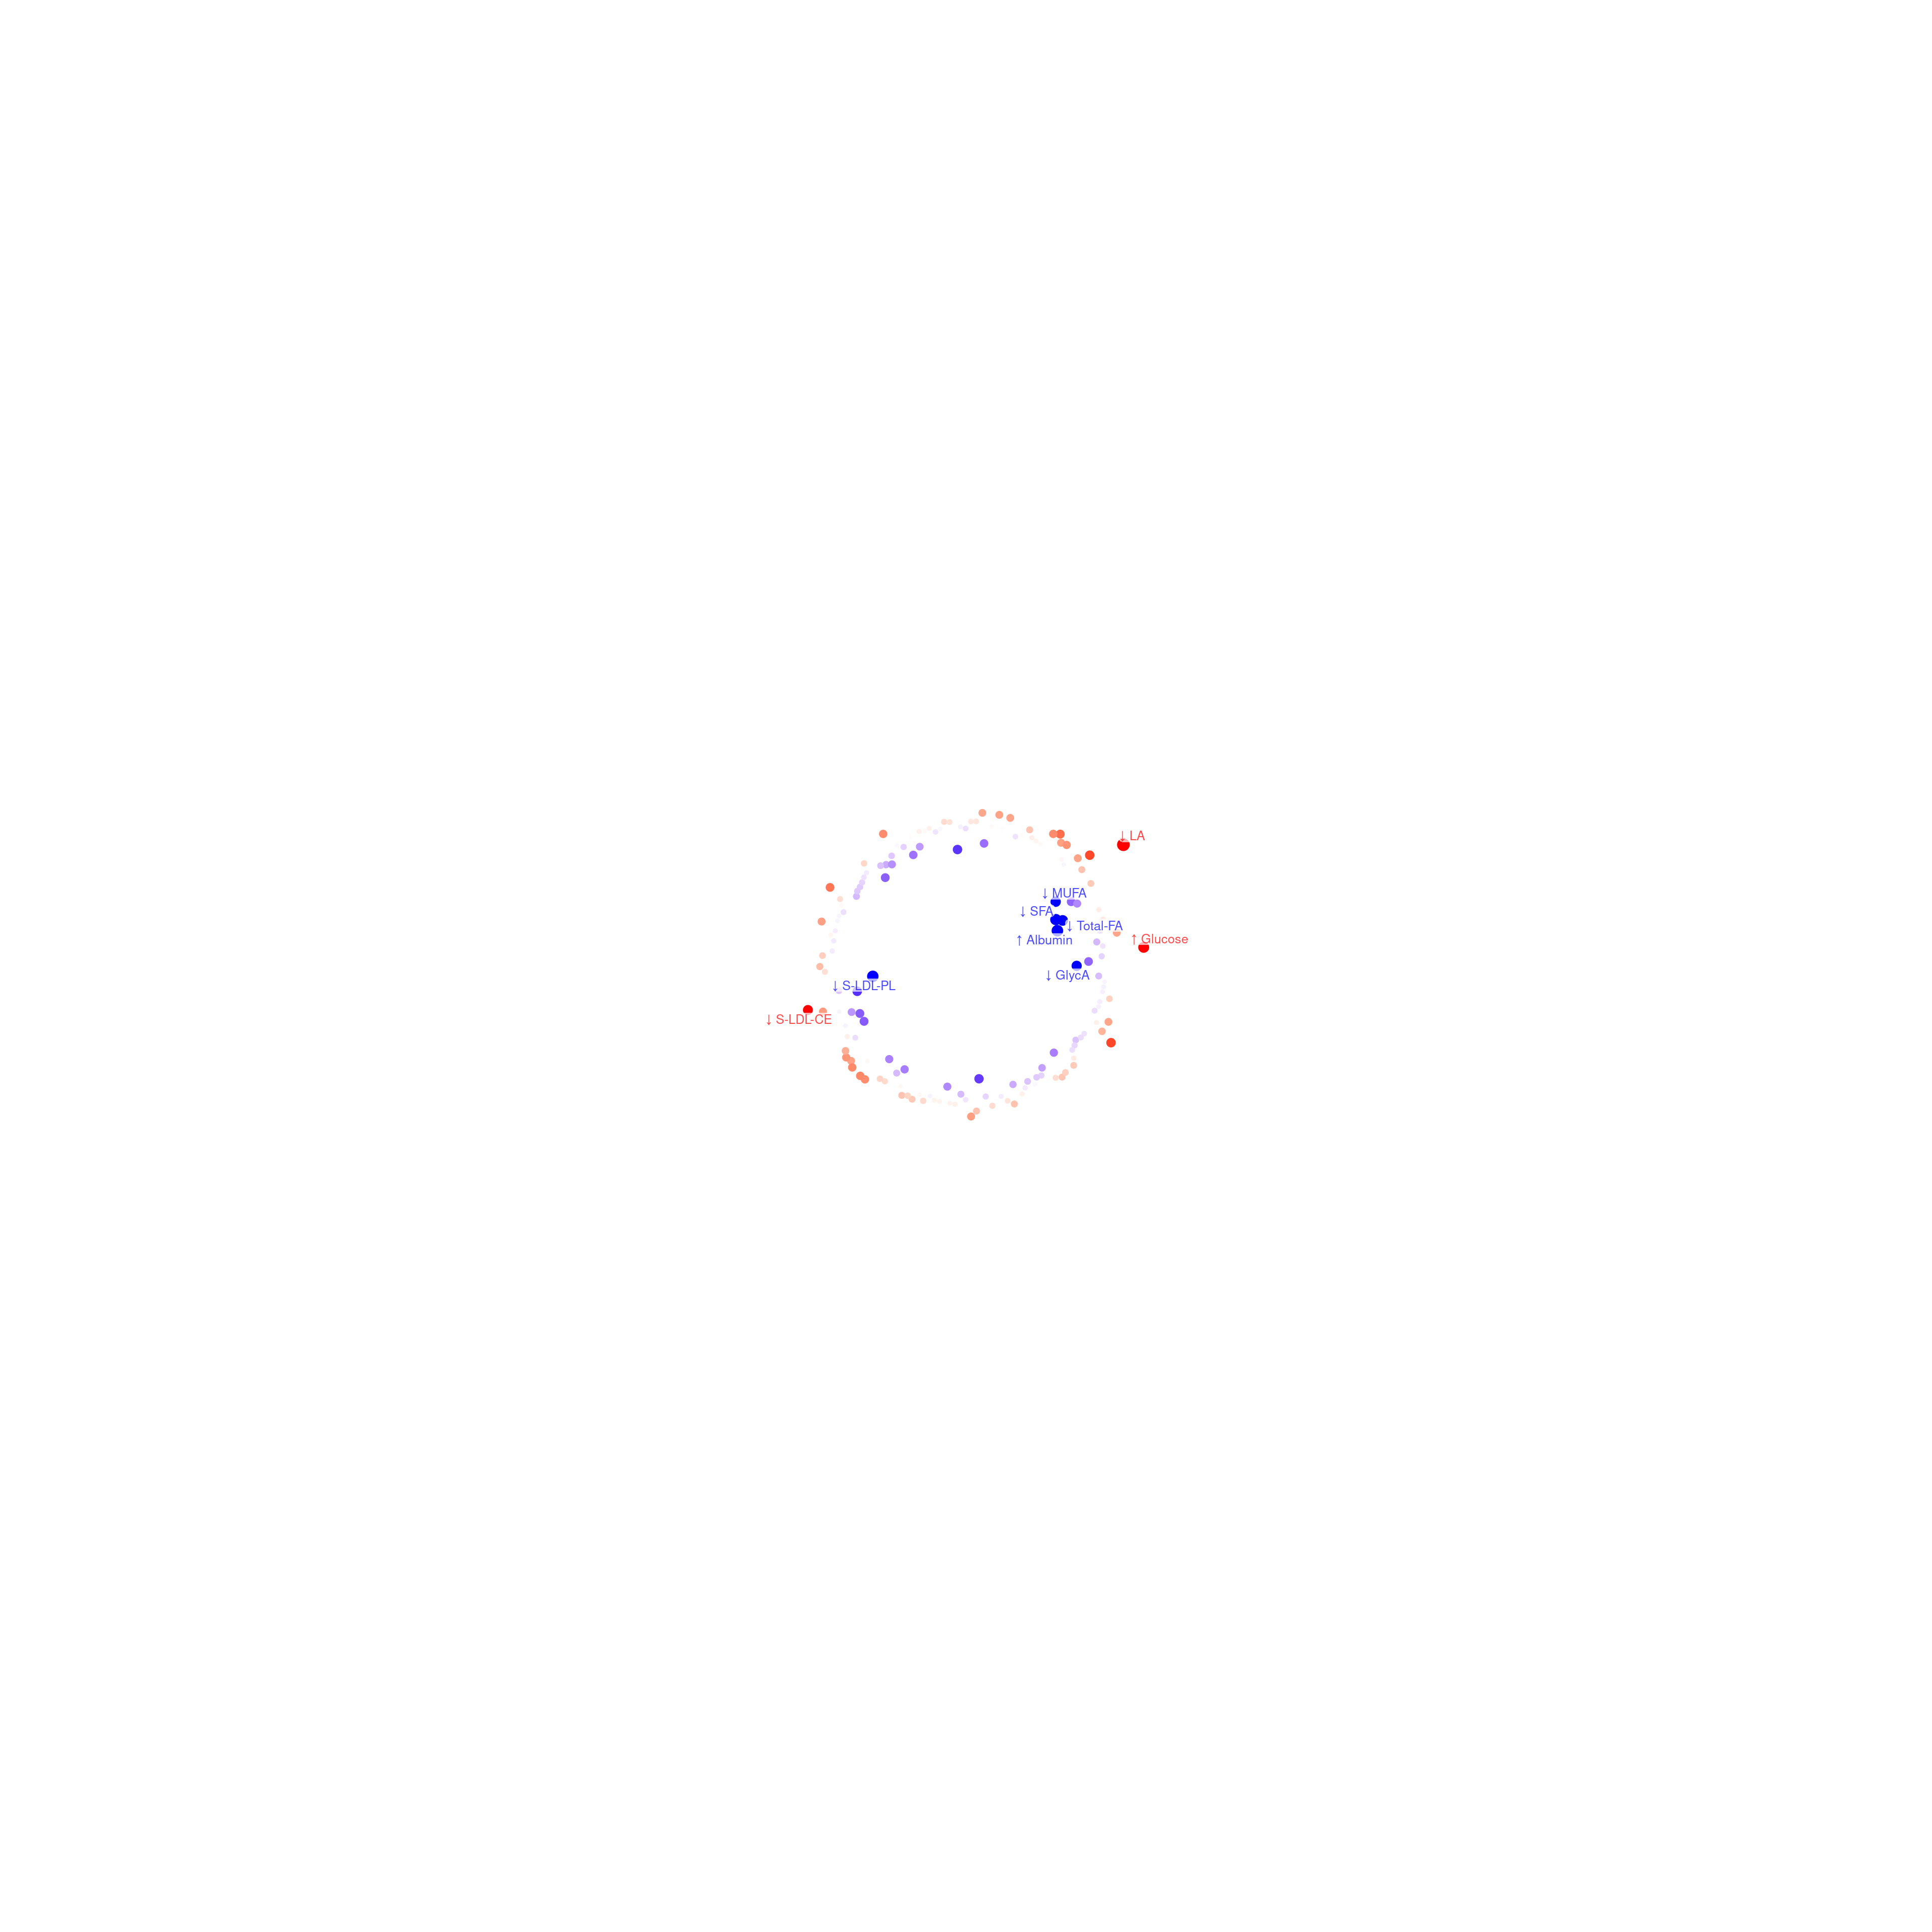

In [452]:
plot_width=12; plot_height=12
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
library(ggrepel)
set.seed(5)
n_eids = 1
clamp_shap = 2
eids = (attrib_sample %>% filter(eid %in% eids_C$eid) %>% ungroup() %>% select(eid) %>% distinct() %>% sample_n(n_eids))$eid
#eids = c("1857858")
temp = attrib_C %>% filter(eid %in% eids) 

attr_cC = ggplot(temp, aes(x=metabolite, y=shap, color=shap)) + 
    geom_point(aes(size=abs(shap)*100))+#, alpha=fct_rev(factor(event)))) + 
    scale_colour_gradient2(low = "blue",high = "red", midpoint = 0, limits=c(-0.2, +0.2), oob=scales::squish) +
    coord_polar(start=0, clip="off")+ ylim(-1,4.5) + 
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())+
    theme(legend.position = "none", panel.grid.major = element_blank())+
    #facet_grid(rows=vars(eid), cols=vars(endpoint), labeller = labeller(endpoint = endpoint_map))+ #+
    #scale_y_continuous(expand=c(0, 0))+
    #gghighlight(max(shap), max_highlight=5L, label_key=metabolite, calculate_per_facet = TRUE)+ #+ 
    #geom_text(data=temp %>% ungroup() %>%
     #        group_by(eid, endpoint) %>% slice_head(n=1) %>% mutate(met_trans=log(hr)),
        #      summarise(hr = mean(hr), met_trans=log(mean(hr))), 
         #     mapping=aes(label=glue("RR:\n{round(hr, 2)}")), x=0, y=-1, size=3, color="black", alpha=0.7) + #x=-60, y=1.5,
    #geom_text(data=temp %>% select(eid, endpoint, event) %>% 
    #          distinct() %>% filter(event==TRUE), label="Prevalent", x=0, y=max_shap*1.3, size=5, color="red") + 
     geom_label_repel(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
                     aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=2, label.size=0.0, label.padding=0.05, alpha=0.7, max.overlaps=100, box.padding=0, direction="both") +
     #geom_label(data = temp %>% group_by(eid, endpoint) %>% arrange(desc(abs(shap))) %>% filter(abs(shap)>0.2) %>% mutate(arrow = ifelse(met_value>0, "\u2191","\u2193")), 
     #                aes(x=metabolite, y=shap, label=glue("{arrow} {abbreviation}")), size=3, alpha=0.7, max.overlaps=100, hjust=0) +
    theme(strip.text.y = element_blank(), axis.line=element_blank())+ theme(panel.spacing = unit(0, "lines"), axis.line=element_line())+scale_size(range = c(0.05,2))+theme(strip.text.y = element_blank(), axis.line=element_blank())
attr_cC

In [453]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_C"
attr_cC %>% ggsave(filename=glue("{plot_name}.pdf"), device=cairo_pdf, width=plot_width, height=plot_height, dpi=320)

In [454]:
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res = 320)
plot_name = "Figures_6_C_C"
attr_cC %>% ggsave(filename=glue("{plot_name}.tiff"), device=tiff, width=plot_width, height=plot_height, dpi=320)

# Left to North and South

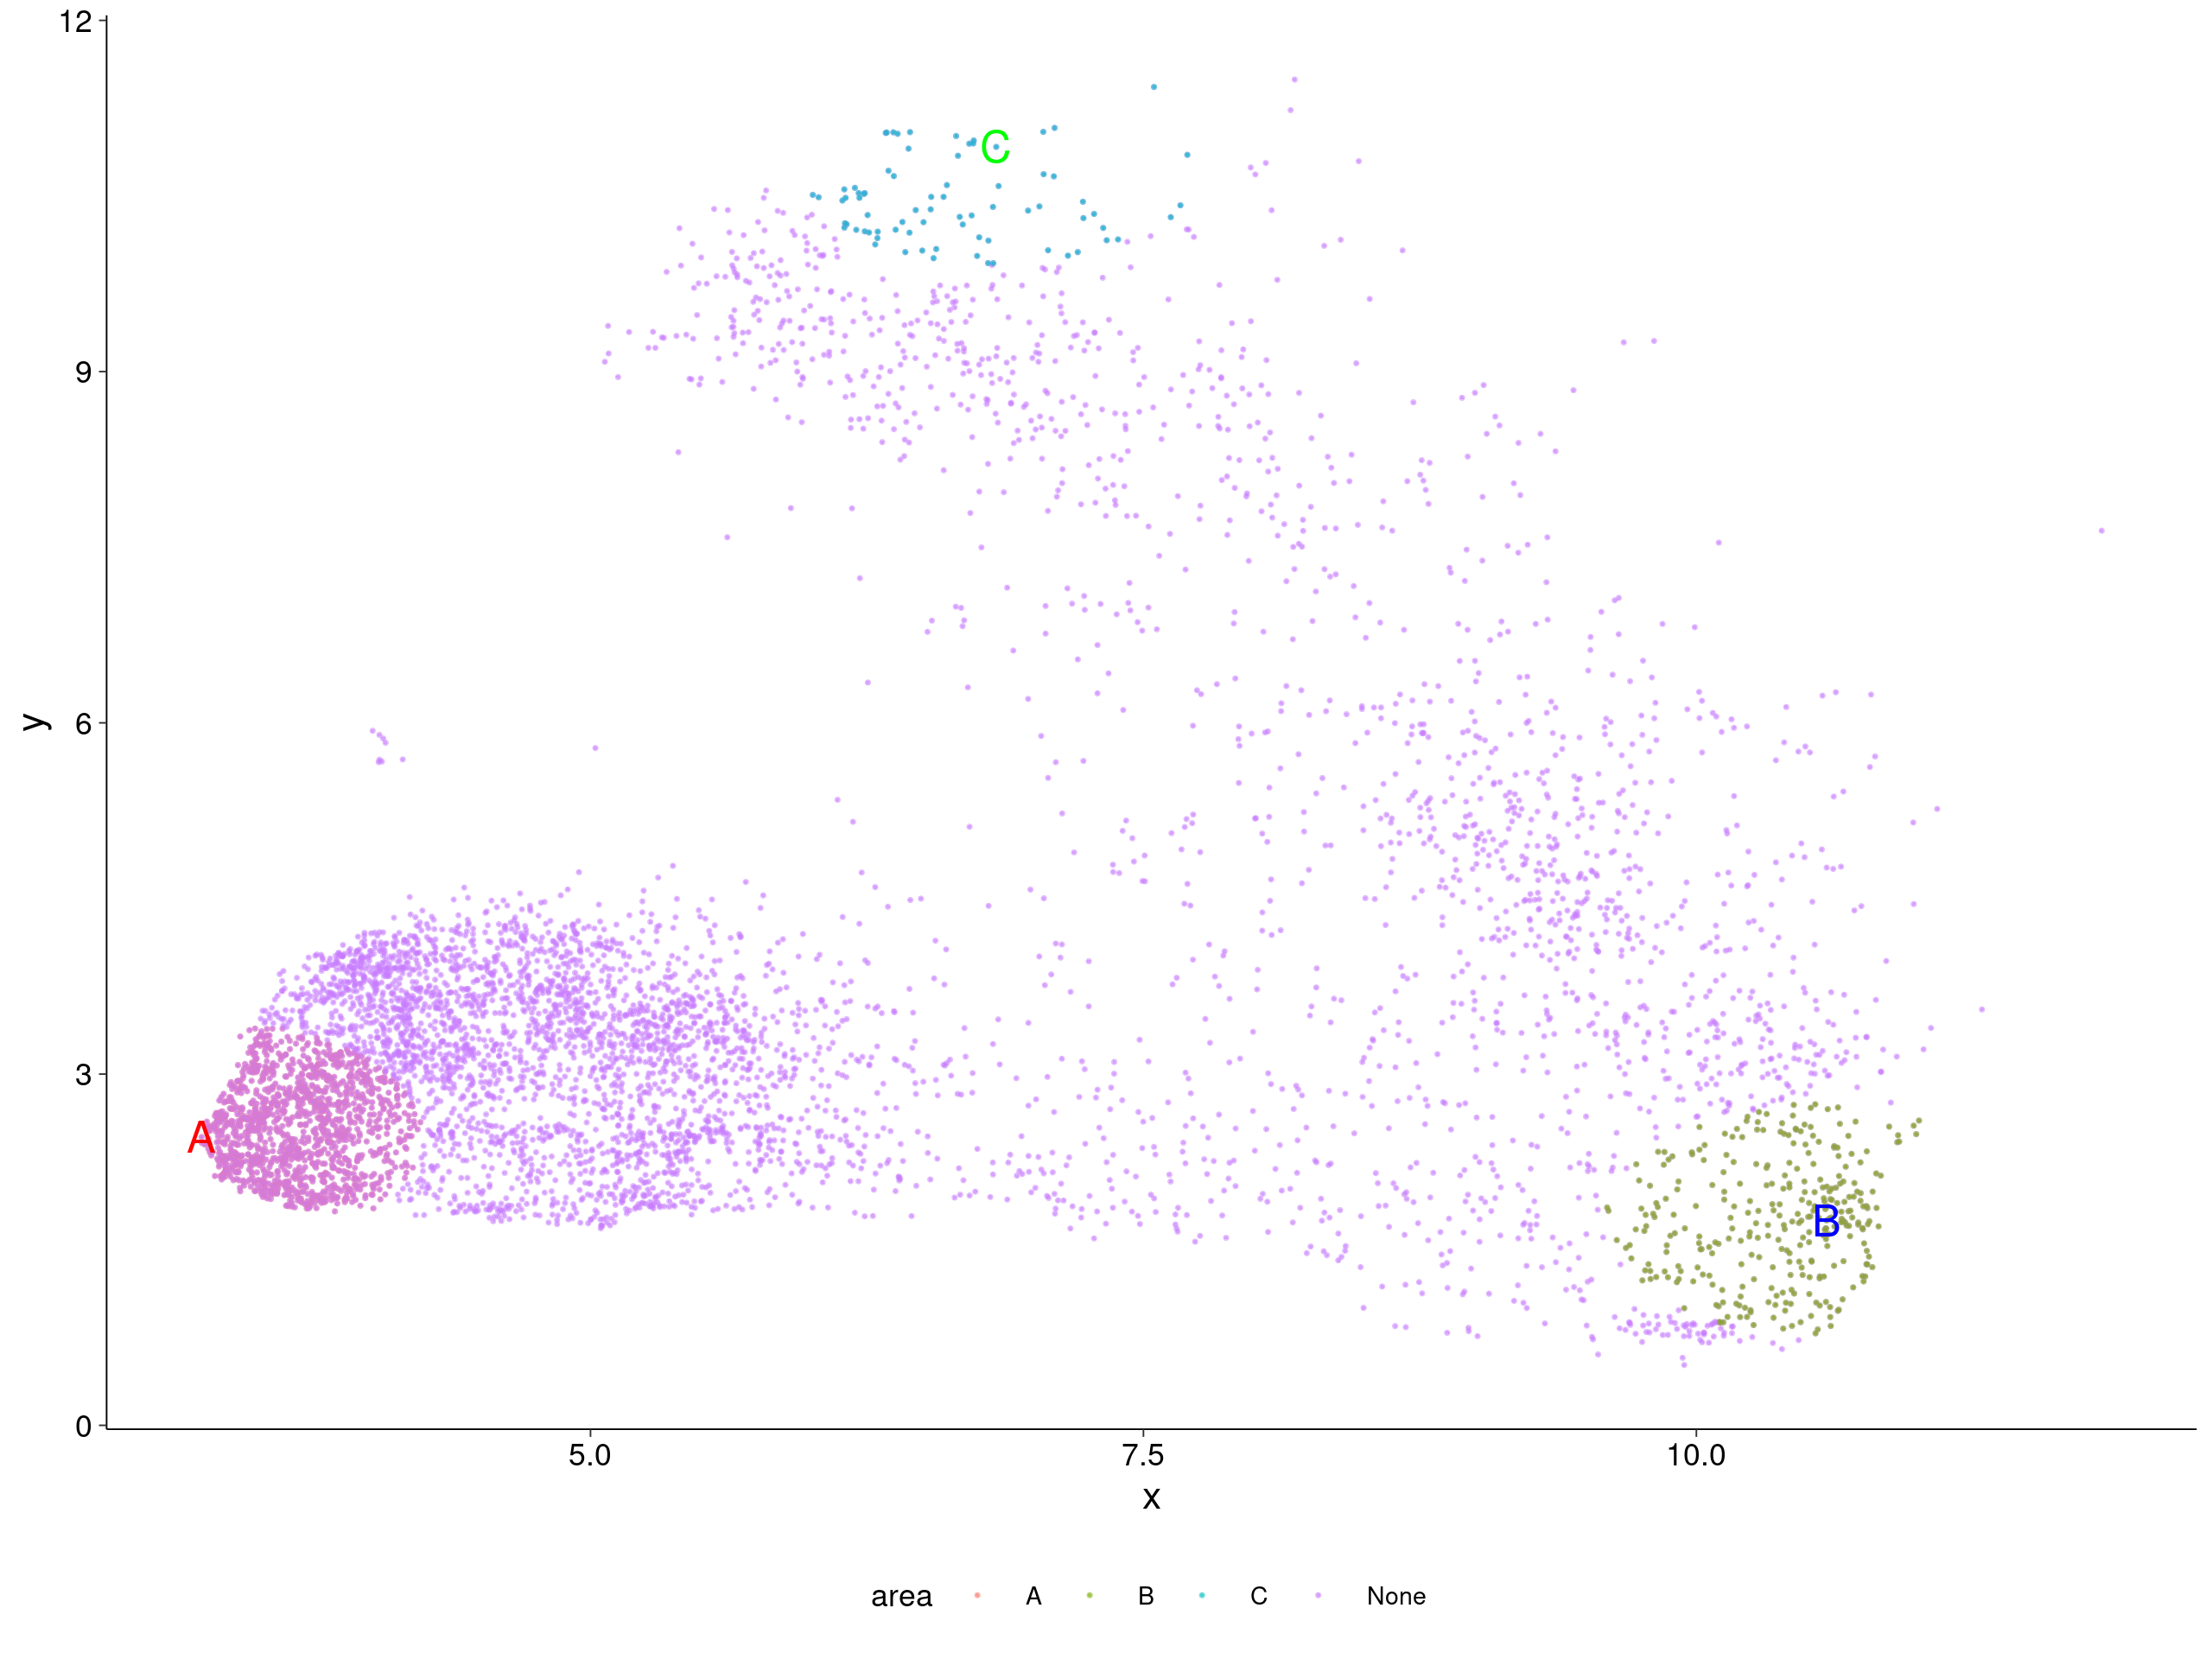

In [31]:
plot_width=8; plot_height=6; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)

g = ggplot(temp_areas, aes(x=x, y=y, color=area)) + geom_point(size=0.1, alpha=0.5) + 
    annotate("text", x=tempA$x, y=tempA$y, size=4, color="red", label="A") +
    annotate("text", x=tempB$x, y=tempB$y, size=4, color="blue", label="B") +
    annotate("text", x=tempC$x, y=tempC$y, size=4, color="green", label="C") 
g

In [36]:
temp_plot = temp_areas %>% filter(area != "None") %>%
    select(eid, x, y, endpoint, hr, event, incident_event, age_at_recruitment, sex, area, starts_with("NMR_"), 
           -NMR_measurement_quality_flagged, -NMR_spectrometer, -NMR_FLAG) %>% 
    pivot_longer(c(starts_with("NMR_")), names_to="metabolite", values_to="value") %>%
    mutate(metabolite=str_remove_all(metabolite, "NMR_")) %>% 
    left_join(mets %>% select(metabolite, abbreviation, subgroup)) %>% 
    mutate(subgroup = factor(subgroup, levels=subgroup_order)) %>% 
    mutate(metabolite = factor(metabolite, levels=metabolite_order)) %>% 
    mutate(abbreviation = factor(abbreviation, levels=abbreviation_order))

Joining, by = "metabolite"



In [37]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


Warning message:
“Removed 185 rows containing non-finite values (stat_ydensity).”


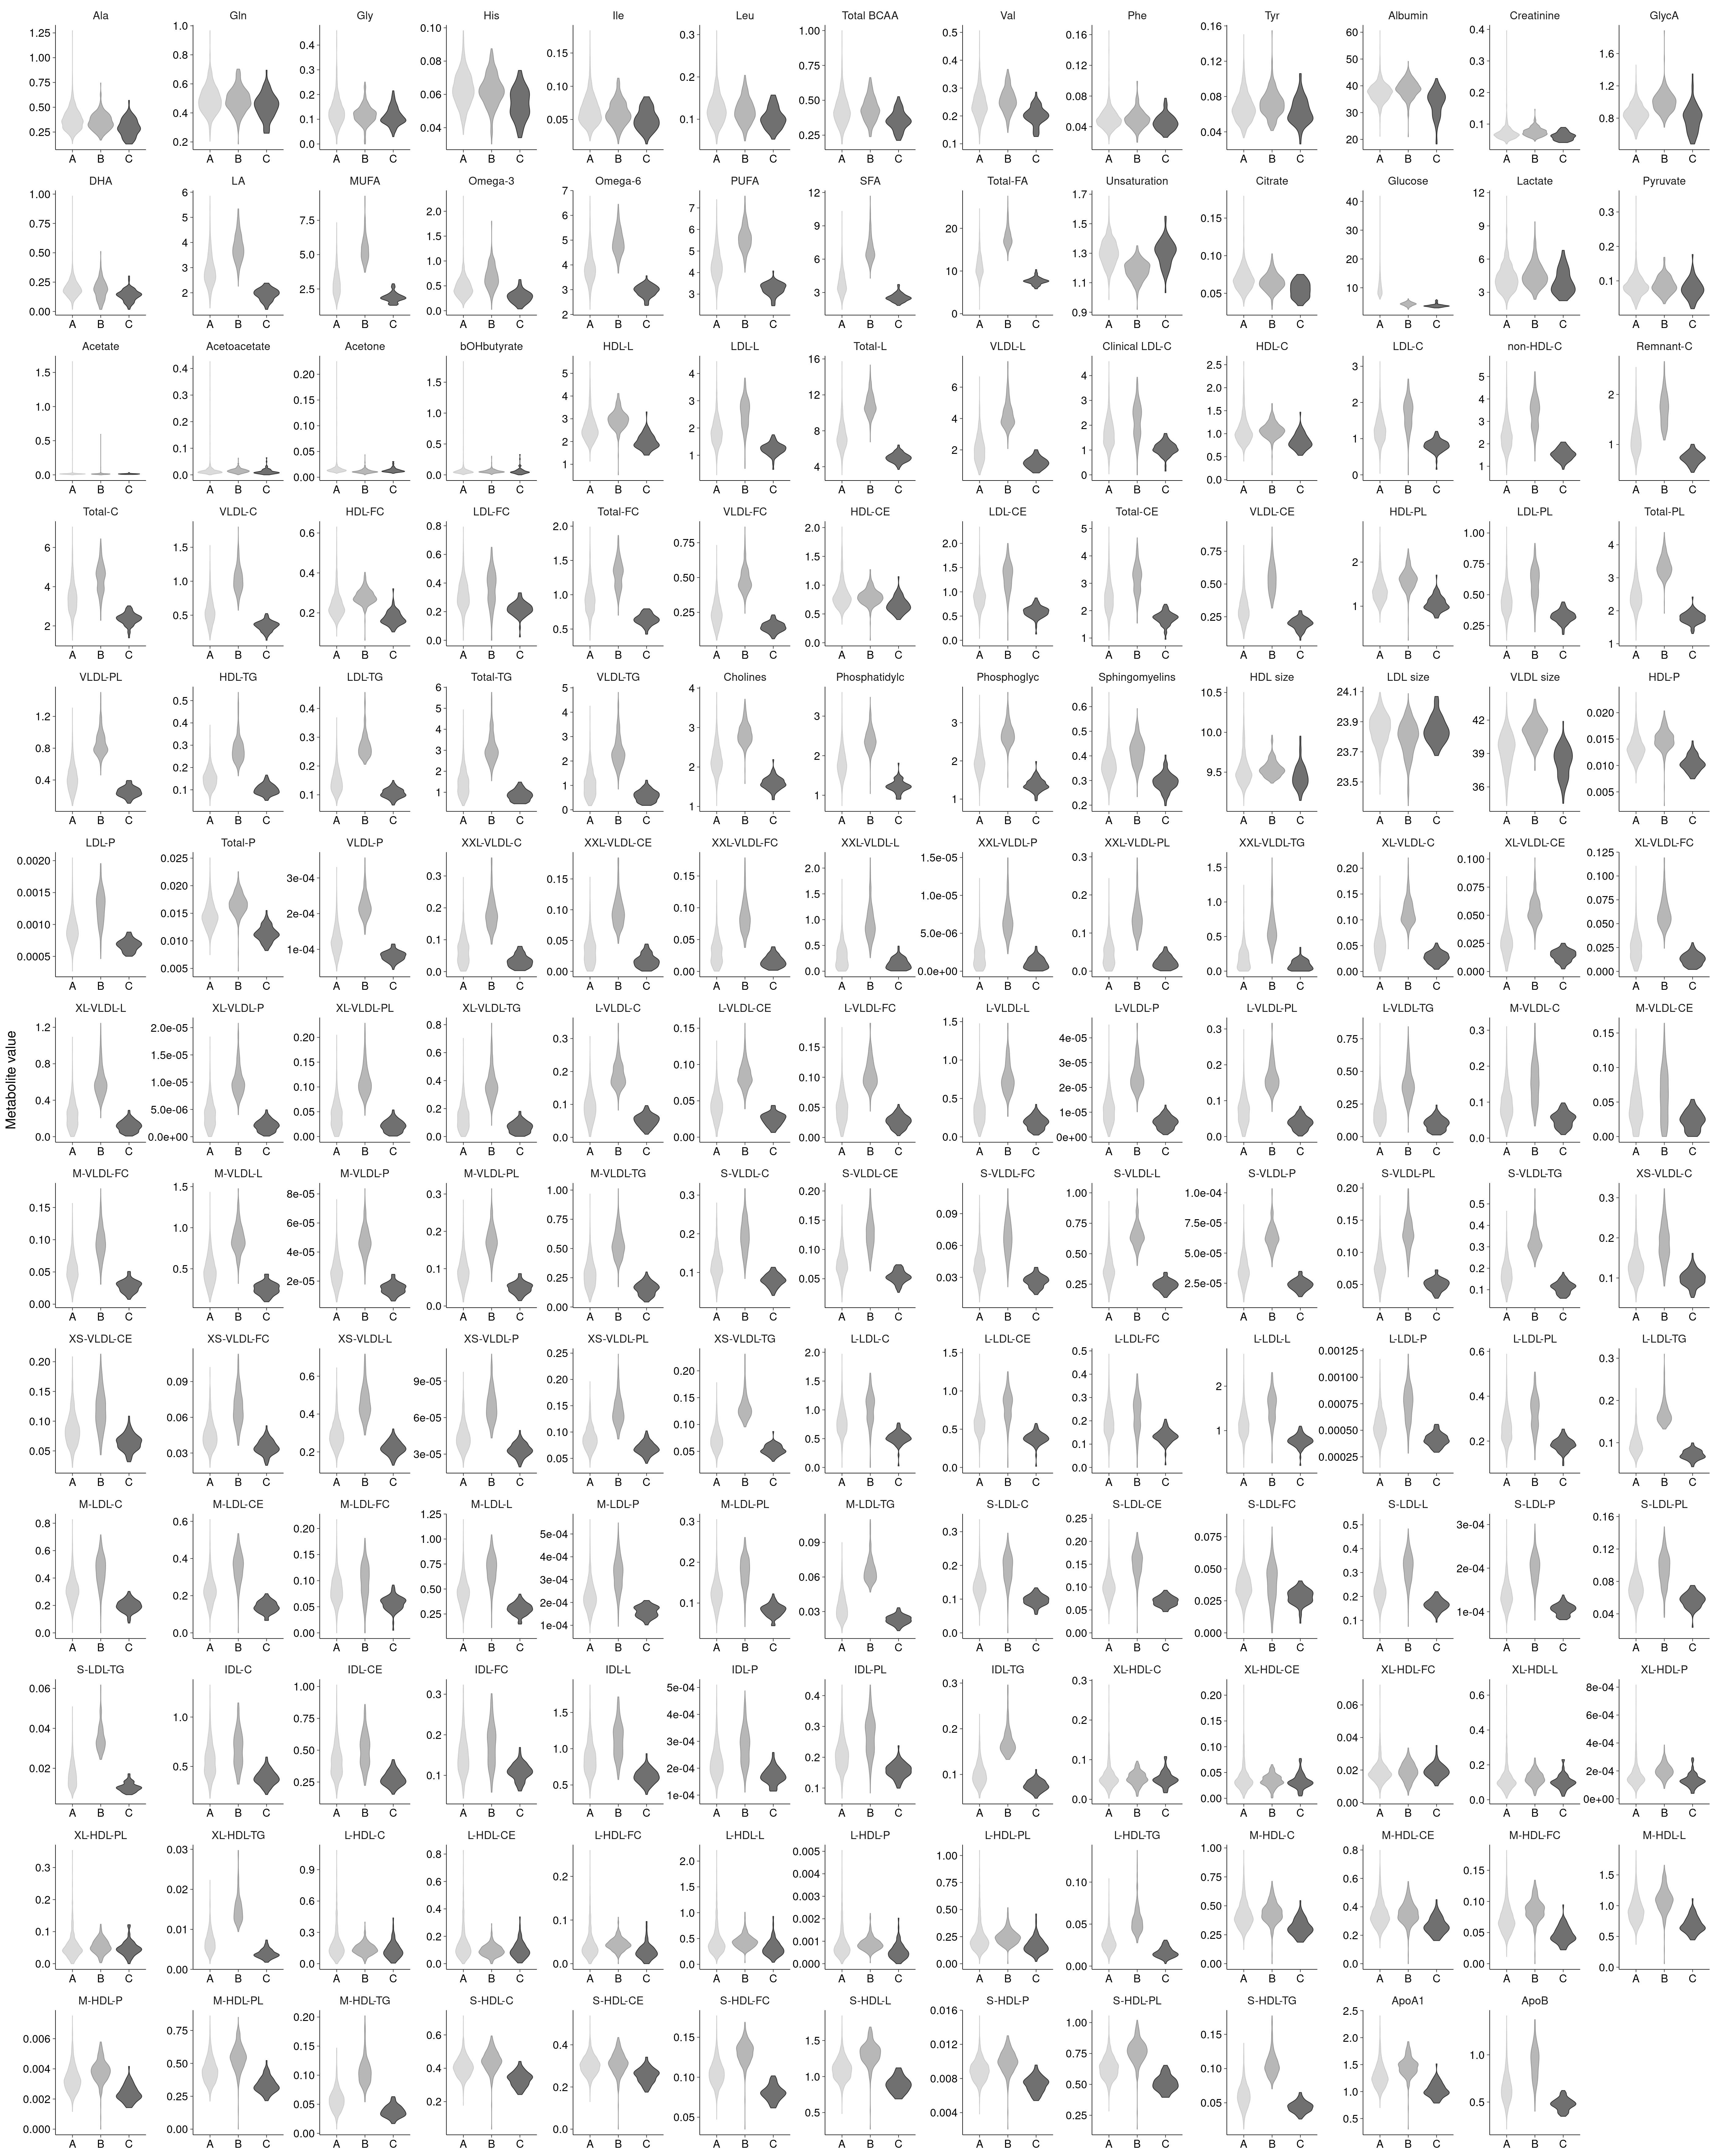

In [41]:
plot_width=17.5; plot_height=22; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)


met_diffs = ggplot(temp_plot, aes(x=factor(area, levels=c("A", "B", "C")), y=value, color=area, fill=area)) +
    labs(x=NULL, y="Metabolite value")+
    geom_violin(alpha=0.7, size=0.25)+
    facet_wrap(~abbreviation, scales="free")+
    scale_fill_grey(start=0.8, end=0.2)+
    scale_color_grey(start=0.8, end=0.2)+
    theme(legend.position="none") + theme(strip.text.x = element_text(size = 8))

met_diffs

In [42]:
library(gt)
plot_name = "Suppl_Figures_9_UMAPAreas"
met_diffs %>% ggsave(filename=glue("/home/steinfej/code/21_metabolomics_analysis/Round1/Figures/outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_dpi)

Warning message:
“package ‘gt’ was built under R version 4.0.5”
Warning message:
“Removed 185 rows containing non-finite values (stat_ydensity).”
